# Processing MAAP data: 

**In this Jupyter Notebook we process the MAAP data for Zeppelin Observatory**:

The data comes in two different data sets i.e. **2014 - 2018** and **2018 - 2023**. 

**For 2014 - 2018:**

- In order to clean we put a minimum flow rate of 900litres per hour. 
- For 2014 - 2018 we analysed the flags present which were as follows: '000010' '000019' '000012' '000000' '00001A' 0 2 200 89 82 10. We accepted just the flags '000000', 0

- Its is assumed that STP is applied to the MAAP data between 2014 and 2018 because the only columns available are as follows: 'date', 'time', 'status', 'concentration of black carbon', 'mass of black carbon', 'air flow rate', 'last value', 'mean values of the concentration\n of black carbon over 1h', '3h','24h'. Hence no, temperatute or pressure of the sample. 
- We had a look at the distribution of the data (i.e. histogram)
- For 2014 to 2018 data we had to convert the mass concentration (given in the files) to absoprtion coefficients. This was done use a MAC of 6.6 
- Detection limits no applied
- Hourly means calculated 


**For 2018 - 2023:**

- The maximum values i.e. default flag values are replaced with np.nan and then removed. 
- for 2018 - 2023 STP is already applied this is given by the flags with '0x0200'. 0x0200 signifies that STP correction is applied.
- Status Flags present: 'FFFFFFFFFF' '200' 200 '0000000200' '0000100200' '0000300200'
- Flags not allowed 'FFFFFFFFFF', '0000100200'
- Flow limit of 900 litres per hour applied
- Detection limits no applied
- Hourly means calculated 

**All data:**

- The data sets are concatened and saved
- the saved file is named based on whether to keep all the data points i.e. so-called extreme values (below detection limit)
- the file we want is: 'C:\Users\DominicHeslinRees\Documents\Analysis\absorption\MAAP\hourly_MAAP_mean_extremes.dat'

**Information on files:**

In the header of the NOAA files, there's a row with the missing value codes for each column. In the earlier MAAP files (with our software), I think you need to use the status value to filter the data (e.g. remove values that are affected by filter changes etc), but I think the NOAA software does most of that interpretation internally and just outputs the missing value code instead if the data are affected.
* In MAAP files with our software, the output values are rounded to 2 decimal places, so the data ends up looking like we're measuring discrete values. The NOAA software doesn't have this issue, but if you downsample the data a bit then the differences with and without NOAA software will probably mostly even out :)

https://gml.noaa.gov/aero/data/datafmt.html

https://gml.noaa.gov/aero/data/

https://gml.noaa.gov/aero/software/aerosols/cpd2flags.html

https://gml.noaa.gov/aero/software/aerosols/cpd2flags.html#system_flags

MAC = absoprtion / Mass concentration

Mass concentration = absorption/MAC

In [1]:
import sys

sys.path.append(r'C:\Users\DominicHeslinRees\Documents\ACP_2023\scripts\MAAP_functions') #load function file i.e. MAAP_functions.py

import MAAP_functions as fu_MAAP
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

out_path = "C:\\Users\\DominicHeslinRees\\Documents\\ACP_2023\\Data\\processed_data\\plots\\"
out_path_datafiles = "C:\\Users\\DominicHeslinRees\\Documents\\ACP_2023\\Data\\processed_data\\MAAP\\"
MAAP_path = 'C:\\Users\\DominicHeslinRees\\Documents\\ACP_2023\\Data\\MAAP\\'

lambda_MAAP = 637 #nm
MAC=6.6
keep_extreme_values = True #no clean i.e. detection limits
apply_mean = True
apply_median = False
savepath = "C:\\Users\\DominicHeslinRees\\Documents\\ACP_2023\\Analysis\\absorption\\MAAP\\"

['Epoch time: seconds from 1970-01-01T00:00:00Z', 'Fractional day of year (Midnight January 1 UTC = 1.00000)', 'Status', 'Aerosol light absorption coefficient (Mm⁻¹)', 'Inversion calculated single scattering albedo', 'Sample pressure (hPa)', 'Aerosol light absorption coefficient calculated from the inversion model (Mm⁻¹)', 'Filter ID', 'Reference detector signal', 'Sample forward detector signal', 'Transmittance', 'Sample 135 degree backscatter detector signal', 'Sample 165 degree backscatter detector signal', 'Integrated sample length Qt/A (m)', 'Pressure drop from ambient to orifice face (hPa)', 'Vacuum pressure pump drop across orifice (hPa)', 'Sample flow (lpm)', 'Accumulated sample volume (m³)', 'Ambient temperature (°C)', 'Measuring head temperature (°C)', 'System temperature (°C)', 'Inversion calculated equivalent black carbon concentration (μg/m³)', 'Inversion calculated aerosol optical depth of the filter', 'List of all system parameters', 'Spot sampling parameters']


status or Status

In [2]:
MAAP_2014_2018 = fu_MAAP.append_data(MAAP_path, years=np.arange(2014,2019,1))

year: 2014
length: 39
year: 2015
length: 356
year: 2016
length: 362
year: 2017
length: 350
year: 2018
length: 110
Columns in MAAP dataset: Index(['date', 'time', 'status', 'concentration of black carbon',
       'mass of black carbon', 'air flow rate', 'last value',
       'mean values of the concentration\n of black carbon over 1h', '3h',
       '24h'],
      dtype='object')


In [3]:
MAAP_2014_2018.head(2)

date      time  status  \
datetime                                          
2014-11-19 15:14:16  14-11-19  15:14:52  000010   
2014-11-19 15:14:24  14-11-19  15:15:00  000010   

                     concentration of black carbon  mass of black carbon  \
datetime                                                                   
2014-11-19 15:14:16                          -0.01                  0.02   
2014-11-19 15:14:24                          -0.01                  0.02   

                     air flow rate  last value  \
datetime                                         
2014-11-19 15:14:16           1000        0.01   
2014-11-19 15:14:24            998        0.01   

                     mean values of the concentration\n of black carbon over 1h  \
datetime                                                                          
2014-11-19 15:14:16                                                0.0            
2014-11-19 15:14:24                                                0.0            

                       3h  24h  
datetime                        
2014-11-19 15:14:16  0.41  0.2  
2014-11-19 15:14:24  0.41  0.2

In [4]:
df_first, df_last = fu_MAAP.remove_duplicates(MAAP_2014_2018)

Length before: 1734677
Duplicate Rows except first occurrence based on all columns are :
no duplicates
Length after: 1734677
Length after: 1734677


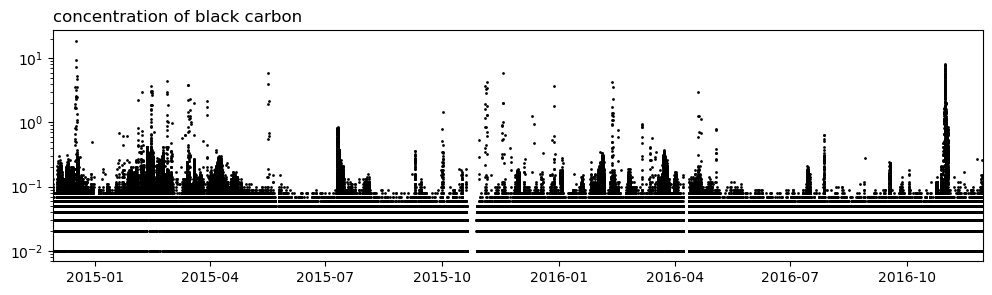

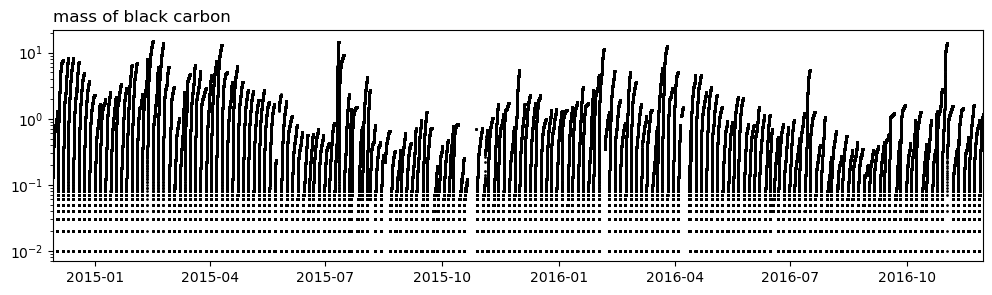

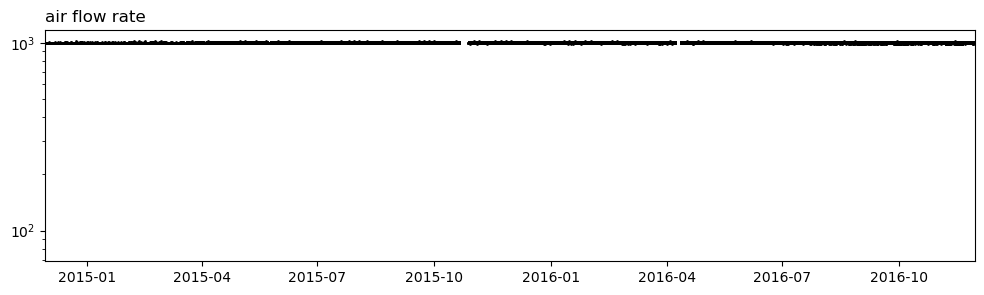

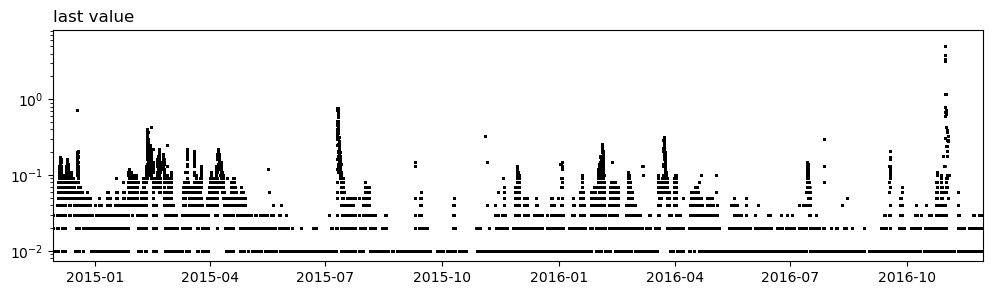

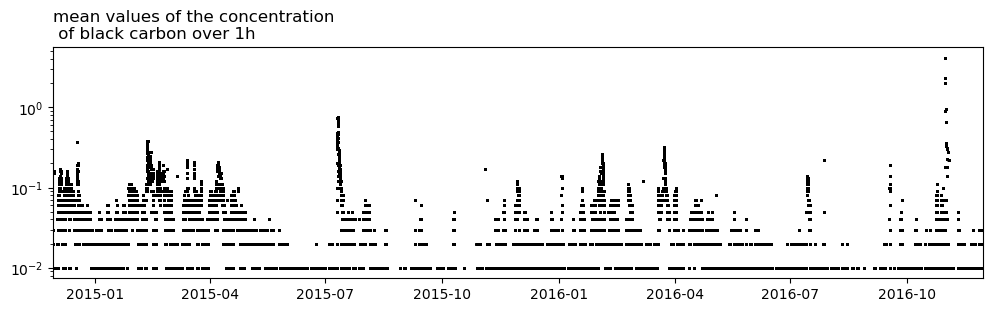

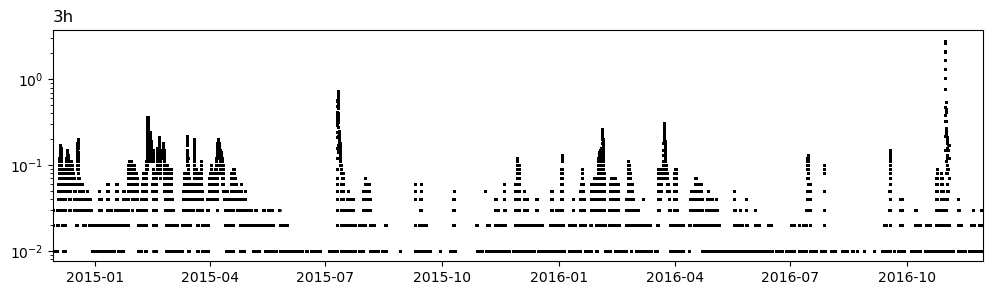

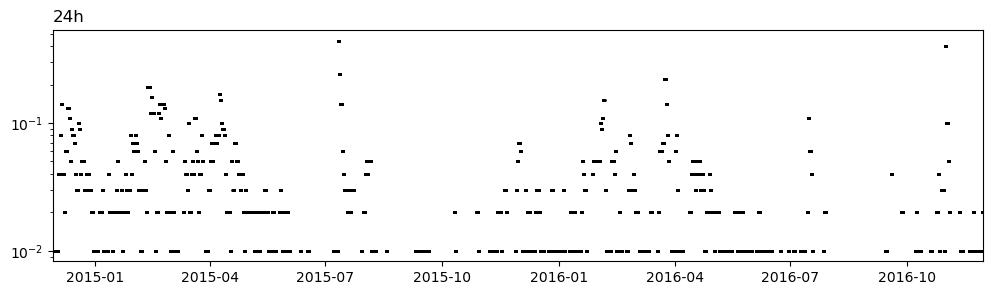

In [5]:
for var in ['concentration of black carbon', 'mass of black carbon', 'air flow rate',
                'last value', 'mean values of the concentration\n of black carbon over 1h', '3h', '24h']:
    fu_MAAP.simple_log_plot(MAAP_2014_2018, var=var, xmin='2014-11-28 15:14:16', 
                    xmax='2016-11-29 17:13:11')

## MAAP 2014 2018: flags 

In [6]:
def get_freq_flags(df, flag_var):
    flags = df[flag_var].unique()
    print(flags)
    print("type: "+str(type(flags[0])))
    flags_strings = [x for x in flags if type(x)==str]
    print(flags_strings)
    print(df[flag_var].value_counts())
    df_freq_instrument_flags = df[flag_var].value_counts().to_frame()
    return df_freq_instrument_flags

In [7]:
def bar_plot(df_flags, var='F1_S13'):
    instrument_flags = df_flags.index.values
    print(instrument_flags)
    freq = df_flags[var].values
    print(freq)    
    fig, ax = plt.subplots(figsize=(6,3))
    x = instrument_flags
    print(x)
    x_pos = [i for i, _ in enumerate(x)]
    print(x_pos)
    plt.bar(x_pos, freq, color='green')
    plt.xlabel("Flags")
    plt.ylabel("Frequency [-]")
    plt.title("")
    plt.xticks(x_pos, x, rotation=90)
    plt.yscale('log')
    plt.show()
    return fig

In [8]:
df_freq_instrument_flags = get_freq_flags(MAAP_2014_2018, flag_var='status')

['000010' '000019' '000012' '000000' '00001A' 0 2 200 89 82 10]
type: <class 'str'>
['000010', '000019', '000012', '000000', '00001A']
0         1732993
2            1124
000000        462
000010         53
82             23
89             10
000012          7
000019          2
00001A          1
200             1
10              1
Name: status, dtype: int64


[0 2 '000000' '000010' 82 89 '000012' '000019' '00001A' 200 10]
[1732993    1124     462      53      23      10       7       2       1
       1       1]
[0 2 '000000' '000010' 82 89 '000012' '000019' '00001A' 200 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


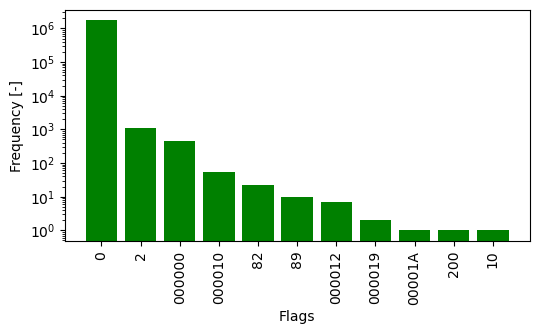

In [9]:
fig = bar_plot(df_freq_instrument_flags, var='status')

## plot hourly mean: 

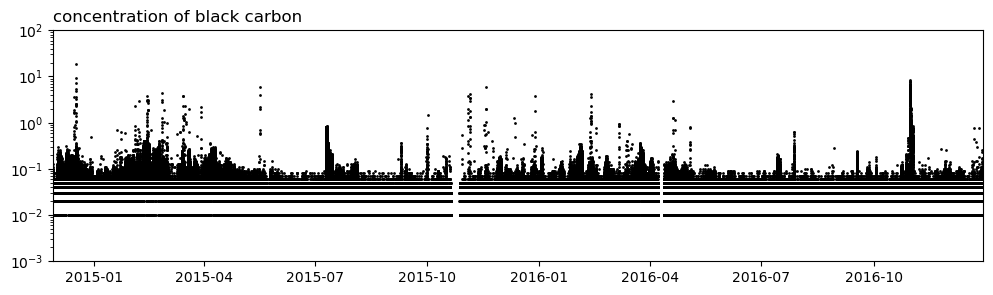

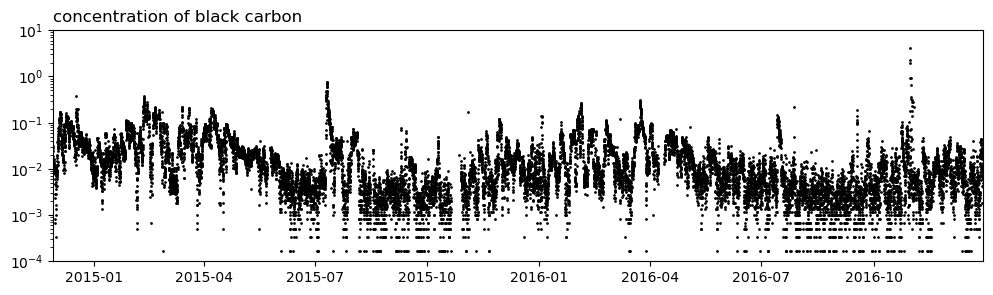

In [10]:
MAAP_hr_mean = MAAP_2014_2018.resample('60T').mean()
MAAP_hr_count = MAAP_2014_2018.resample('60T').count()
for var in ['concentration of black carbon']: 
    fu_MAAP.simple_log_plot(MAAP_2014_2018, var=var, ymin=10**(-3), ymax=10**(2), xmin='2014-11-28 15:14:16', 
                    xmax='2016-12-29 17:13:11')
    fu_MAAP.simple_log_plot(MAAP_hr_mean, var=var, ymin=10**(-4), ymax=10**(1), xmin='2014-11-28 15:14:16', 
                    xmax='2016-12-29 17:13:11')

## lenght of hourly raw data: 

In [11]:
MAAP_hr_mean = MAAP_2014_2018.resample('60T').mean()
lenght_of_raw_hourly_data = len(MAAP_hr_mean)
print(lenght_of_raw_hourly_data)

29955


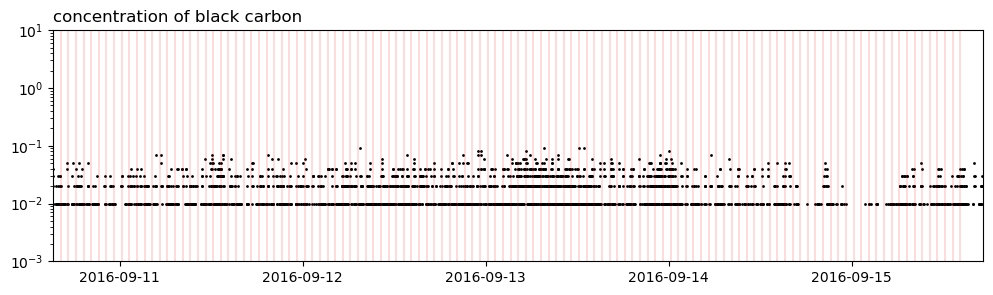

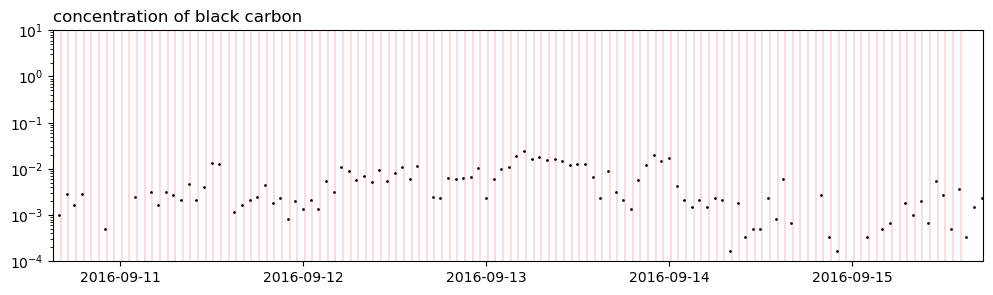

In [12]:
MAAP_hr_mean = MAAP_2014_2018.resample('60T').mean()
MAAP_hr_count = MAAP_2014_2018.resample('60T').count()
for var in ['concentration of black carbon']: 
    fu_MAAP.simple_log_plot(MAAP_2014_2018, var=var, ymin=10**(-3), ymax=10**(1), xmin='2016-09-10 15:14:16', 
                    xmax='2016-09-15 17:13:11', add_hour_lines=True)
    fu_MAAP.simple_log_plot(MAAP_hr_mean, var=var, ymin=10**(-4), ymax=10**(1), xmin='2016-09-10 15:14:16', 
                    xmax='2016-09-15 17:13:11', add_hour_lines=True)

In [13]:
MAAP_2014_2018.columns

Index(['date', 'time', 'status', 'concentration of black carbon',
       'mass of black carbon', 'air flow rate', 'last value',
       'mean values of the concentration\n of black carbon over 1h', '3h',
       '24h'],
      dtype='object')

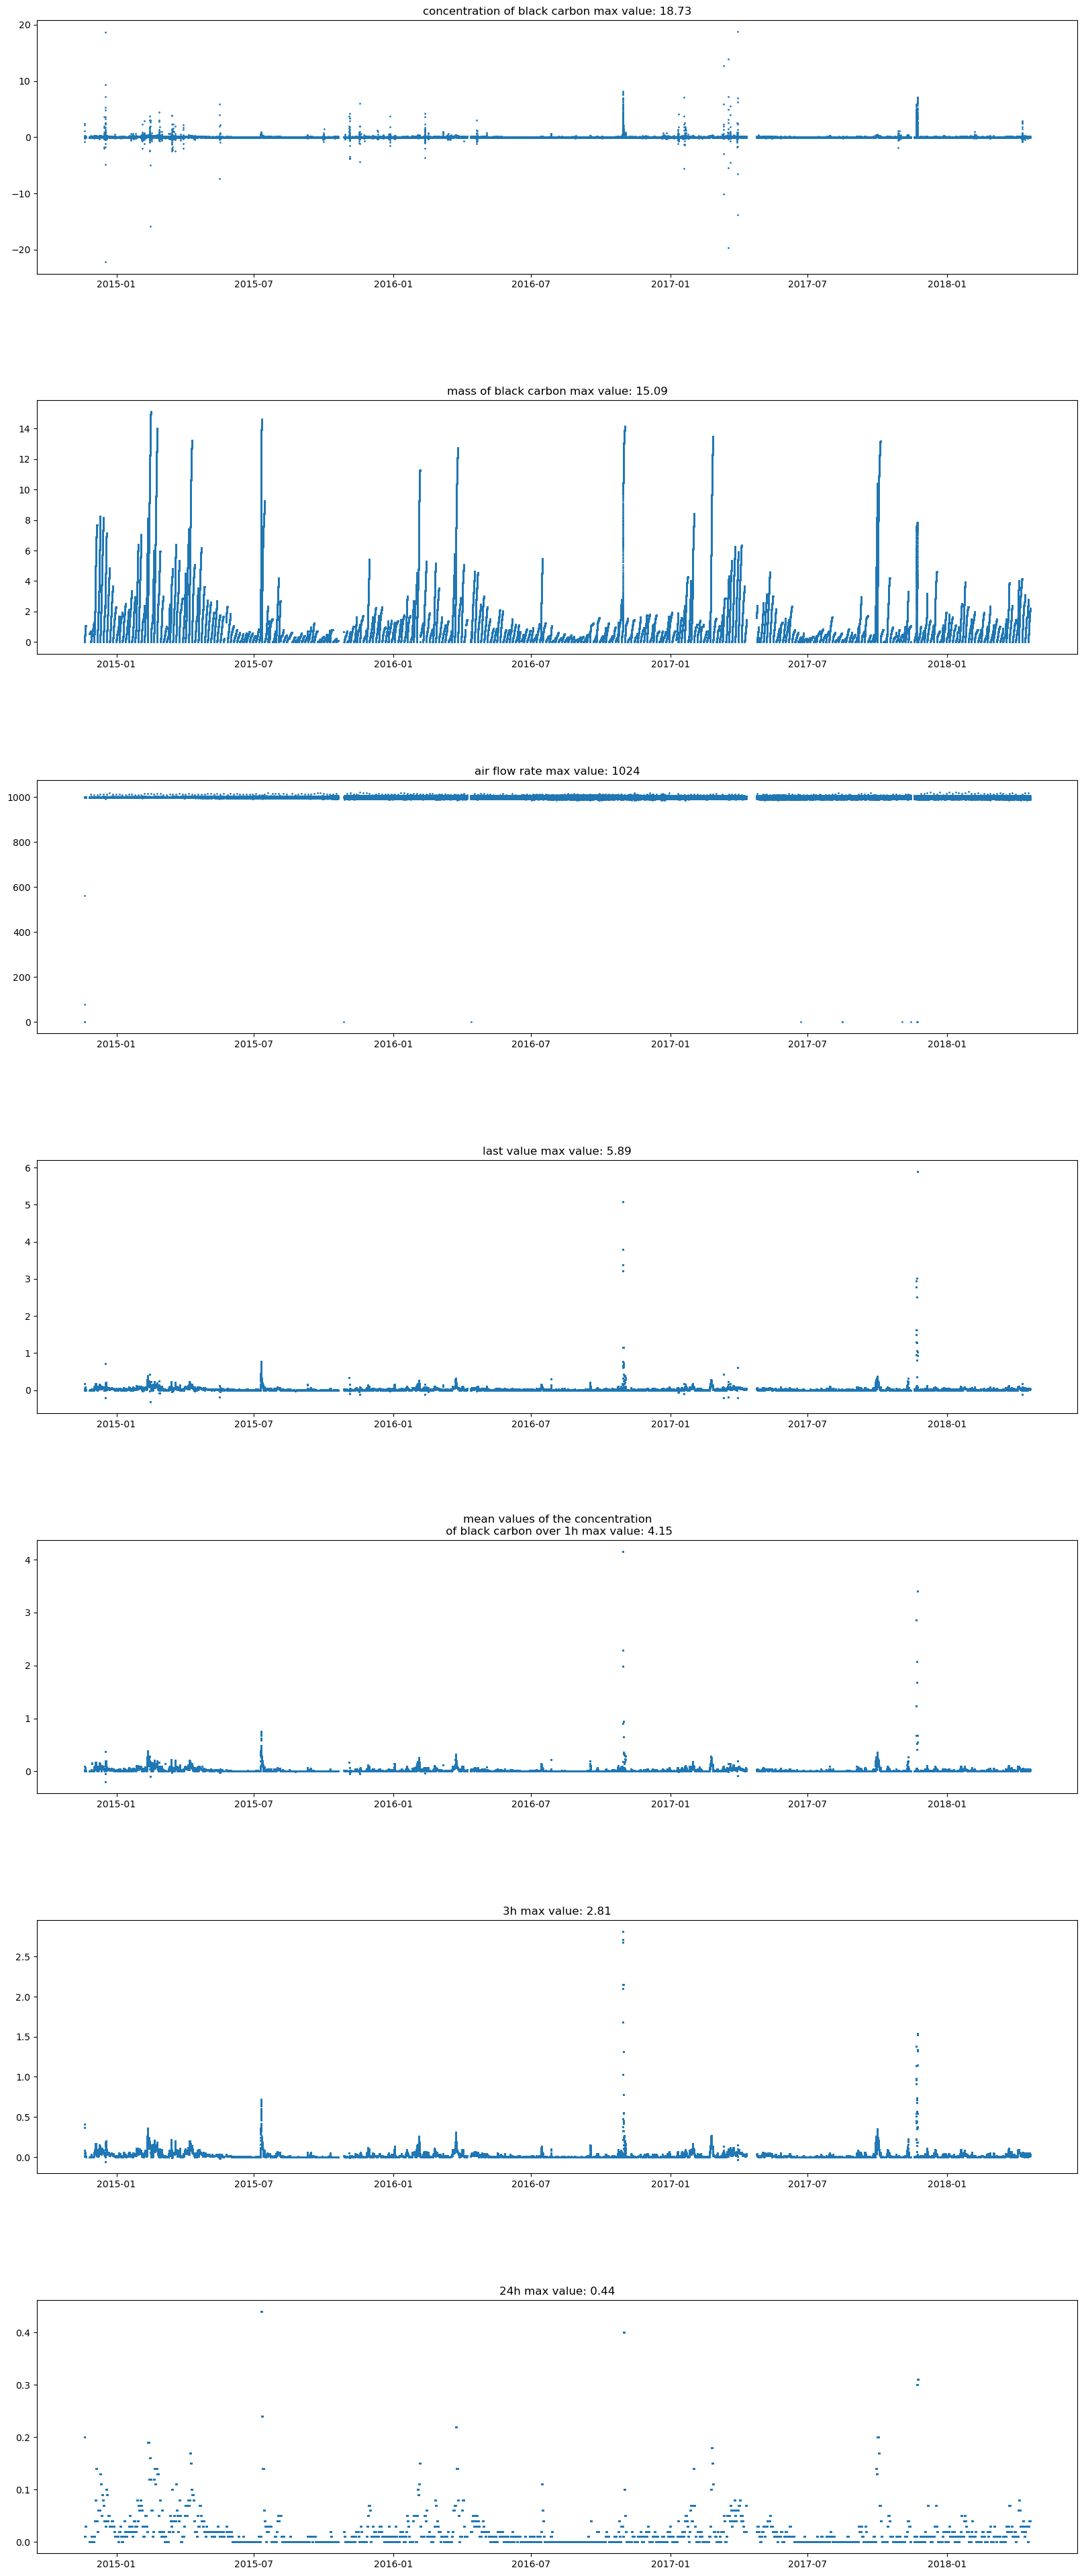

In [14]:
fu_MAAP.create_subplots(MAAP_2014_2018)

## Flow: 

The MAAP operates at 670nm, has a 10s time response, features automatic filter changing based on absolute transmission, constant sample flow rate (1000 litre/hour) controlled by a variable speed pump and recording of the actual sample flow, making it an ideal instrument for unattended long term monitoring of black carbon mass loadings.

In [15]:
print(MAAP_2014_2018['status'].unique())
MAAP_2014_2018_above_min_flow = fu_MAAP.remove_flow_with_threshold(MAAP_2014_2018, min_flow = 900)
print(MAAP_2014_2018_above_min_flow['status'].unique())

['000010' '000019' '000012' '000000' '00001A' 0 2 200 89 82 10]
['000010' '000019' '000012' '000000' '00001A' 0 2 200 89 82 10]


## Inital plot of raw data

In [16]:
fu_MAAP.provide_average_time_difference(MAAP_2014_2018_above_min_flow)

average: 0 days 00:01:02.163963183


Timedelta('0 days 00:01:02.163963183')

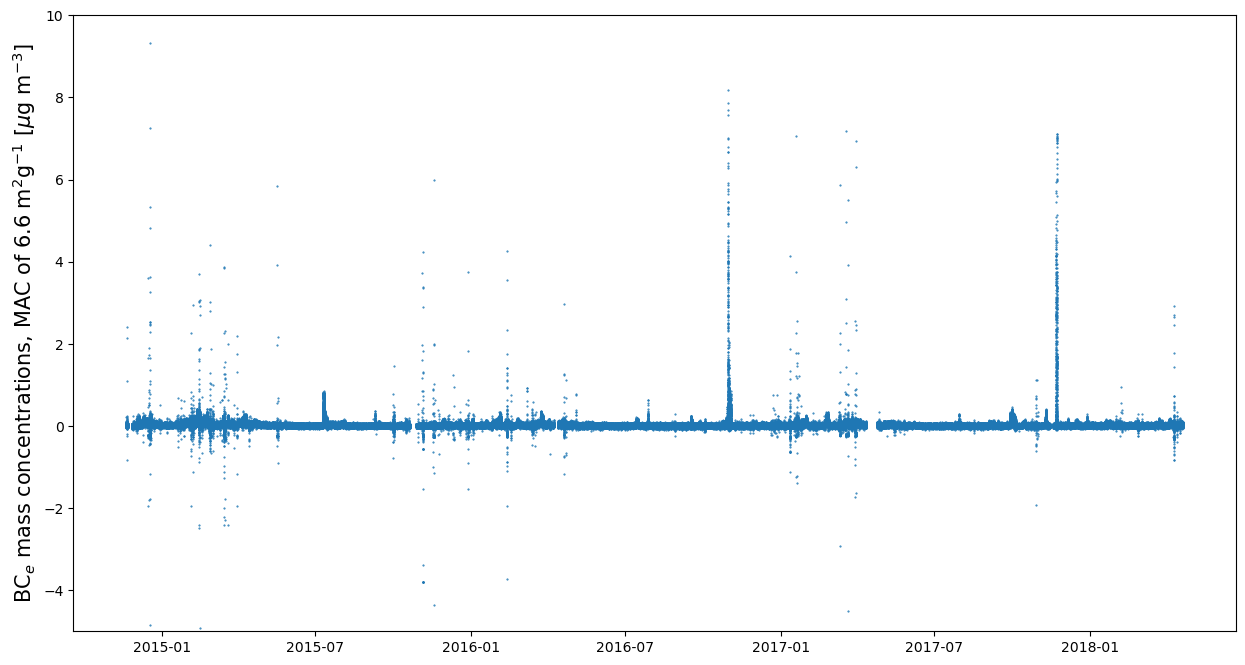

In [17]:
fu_MAAP.inital_plot(MAAP_2014_2018_above_min_flow, var='concentration of black carbon')

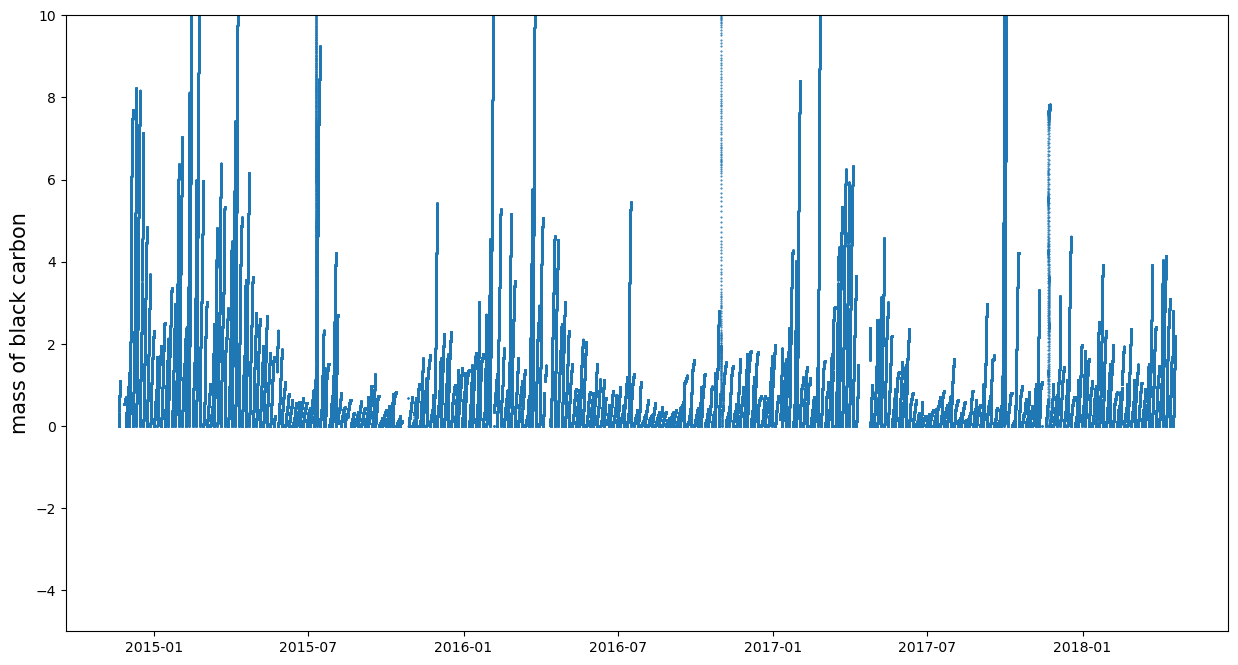

In [18]:
fu_MAAP.inital_plot(MAAP_2014_2018_above_min_flow, var='mass of black carbon')

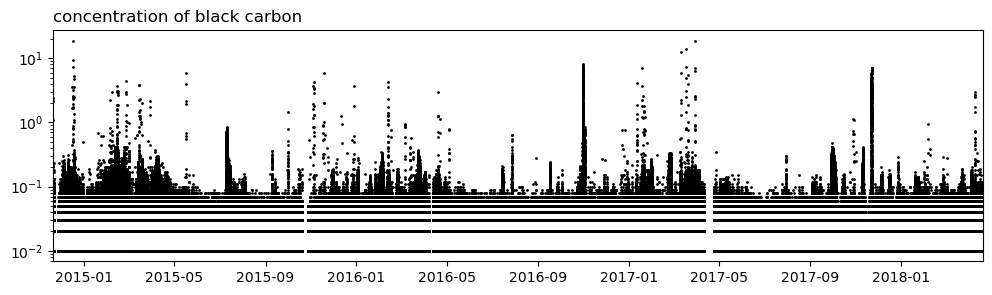

In [19]:
fig = fu_MAAP.simple_log_plot(MAAP_2014_2018_above_min_flow, var='concentration of black carbon')

## Flags

In [20]:
flags = MAAP_2014_2018_above_min_flow['status'].unique()
print(flags)

['000010' '000019' '000012' '000000' '00001A' 0 2 200 89 82 10]


In [21]:
print("Flags present in data: ")
flags = MAAP_2014_2018_above_min_flow.status.unique()
print(flags)
print(MAAP_2014_2018_above_min_flow.status.value_counts())
print("0 makes up " + str(MAAP_2014_2018_above_min_flow.status.value_counts(normalize=True)[0]*100) + " % of flags")

Flags present in data: 
['000010' '000019' '000012' '000000' '00001A' 0 2 200 89 82 10]
0         1732993
2            1124
000000        462
000010         53
82             23
89             10
000012          7
000019          2
00001A          1
200             1
10              1
Name: status, dtype: int64
0 makes up 99.90292140842358 % of flags


In [22]:
MAAP_2014_2018_flags_removed, MAAP_2014_2018_flags = fu_MAAP.accept_flags(MAAP_2014_2018_above_min_flow, flags, flags_accepted = ['000000', 0])

keep flags: ['000000', 0]
Data points removed from data set: 0.0007044539127457158


In [23]:
MAAP_2014_2018_flags.status.unique()

array(['000010', '000019', '000012', '00001A', 2, 200, 89, 82, 10],
      dtype=object)

## Values counts - have a look at value steps: 

        count
-0.00  643908
 0.01  294887
 0.02  197085
 0.03  133504
 0.04   91772


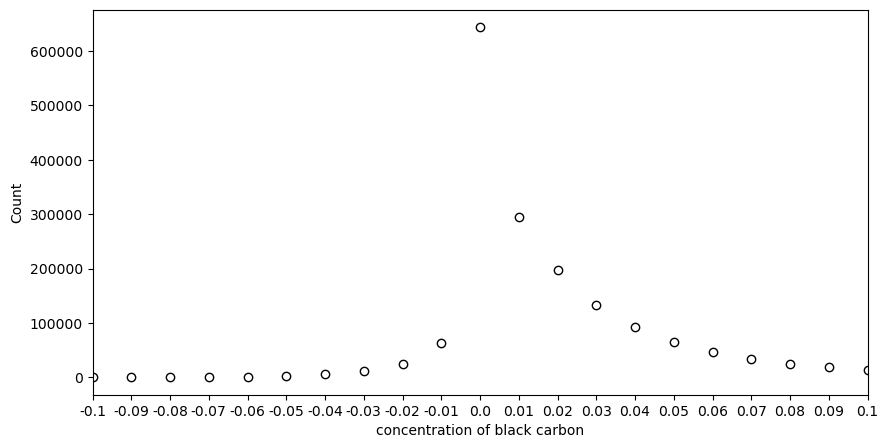

In [24]:
df_value_counts = fu_MAAP.count_values(MAAP_2014_2018_flags_removed)
fu_MAAP.value_count_plot(df_value_counts)

## Create historgam: 

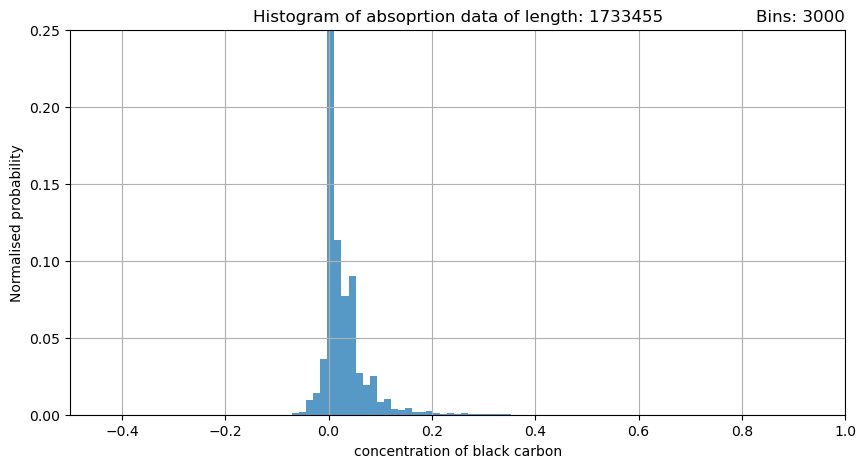

In [25]:
df_value_counts.sort_index(inplace=True)
fig = fu_MAAP.create_histogram(MAAP_2014_2018_flags_removed, var='concentration of black carbon', bin_num=3000, ymax=0.25, xmax=1)

## Compare df with and without flags

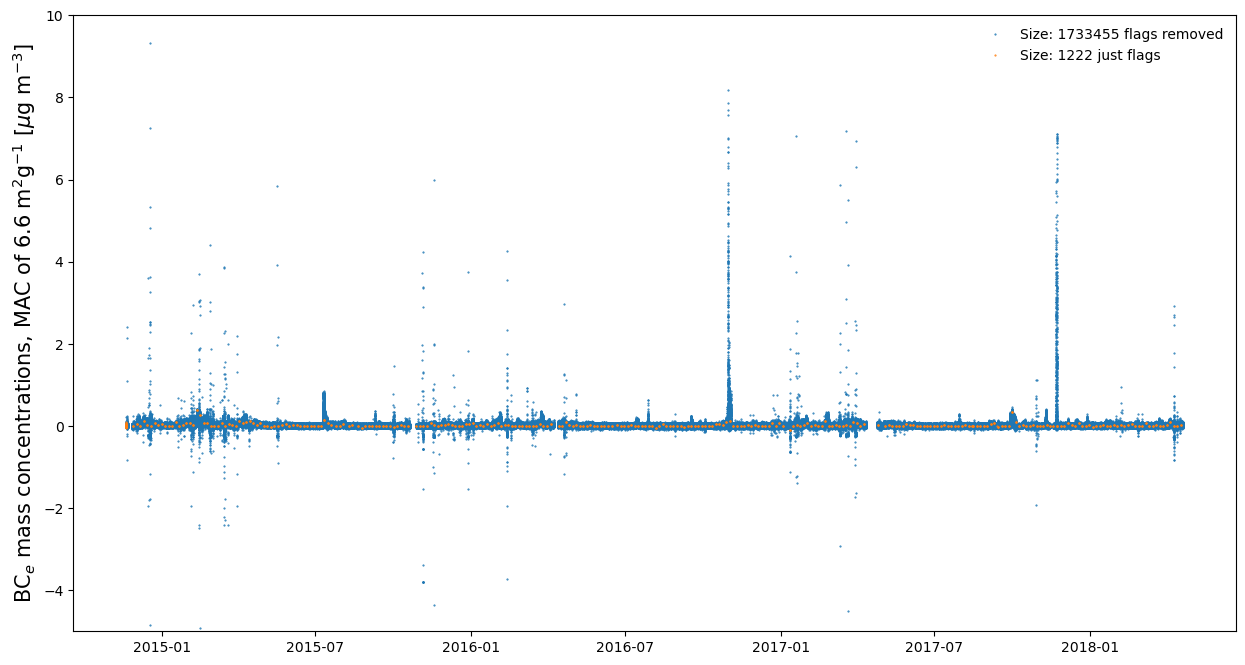

In [26]:
fu_MAAP.inital_2plot(MAAP_2014_2018_flags_removed, MAAP_2014_2018_flags, var='concentration of black carbon')

### Remove extreme values

A measurement bias after every filter change can occur if the absorption coefficients exceed $\sim$ 20 Mm$^{-1}$
correction methods for an artifact found to affect the instrument accuracy in environments characterized by high black carbon concentrations. The artifact occurs after a filter spot change – as BC mass is accumulated on a fresh filter spot, the attenuation of the light (raw signal) is weaker than anticipated. This causes a sudden decrease, followed by a gradual increase in measured BC concentration. The artifact is present in the data when the BC concentration exceeds ∼ 3 µg m−3
at the typical MAAP flow rate of 16.7 L min−1 or 1 m3 h−1. The artifact is caused by erroneous dark counts in the photodetector measuring the transmitted light, in combination with an instrument internal averaging procedure of the photodetector raw signals. 

It was found that, in addition to the erroneous temporal response of the data, concentrations higher than 9 µg m−3 (at the flow rate of 16.7 L min−1) are underestimated by the MAAP. 

In [27]:
MAAP_2014_2018_extreme_removed_kept = fu_MAAP.remove_extreme_values(MAAP_2014_2018_flags_removed, var='concentration of black carbon',
                                                       keep_extreme_values=keep_extreme_values)

if keep_extreme_values == False: 
    fu_MAAP.inital_2plot(MAAP_2014_2018_flags_removed, MAAP_2014_2018_extreme_removed_kept, var='concentration of black carbon')

Keep extreme values: True


In [28]:
MAAP_2014_2018_flags_removed.head(2)

date      time  status  \
datetime                                          
2014-11-19 15:53:24  14-11-19  15:54:00  000000   
2014-11-19 15:54:24  14-11-19  15:55:00  000000   

                     concentration of black carbon  mass of black carbon  \
datetime                                                                   
2014-11-19 15:53:24                           0.01                   0.0   
2014-11-19 15:54:24                           0.01                   0.0   

                     air flow rate  last value  \
datetime                                         
2014-11-19 15:53:24            999        0.01   
2014-11-19 15:54:24            999        0.01   

                     mean values of the concentration\n of black carbon over 1h  \
datetime                                                                          
2014-11-19 15:53:24                                                0.0            
2014-11-19 15:54:24                                                0.0            

                       3h  24h            timestep  
datetime                                            
2014-11-19 15:53:24  0.37  0.2 2014-11-19 15:53:24  
2014-11-19 15:54:24  0.37  0.2 2014-11-19 15:54:24

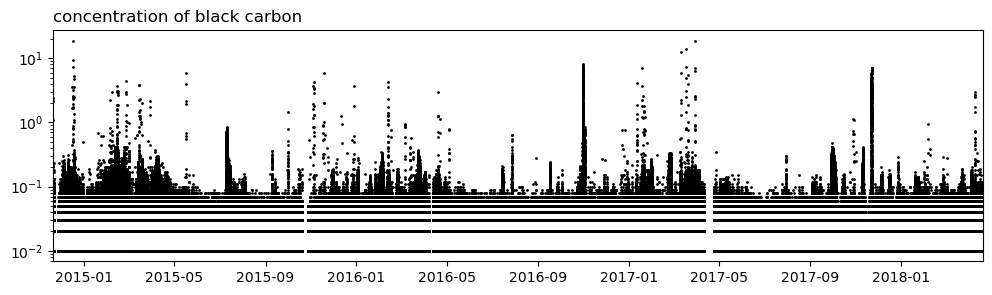

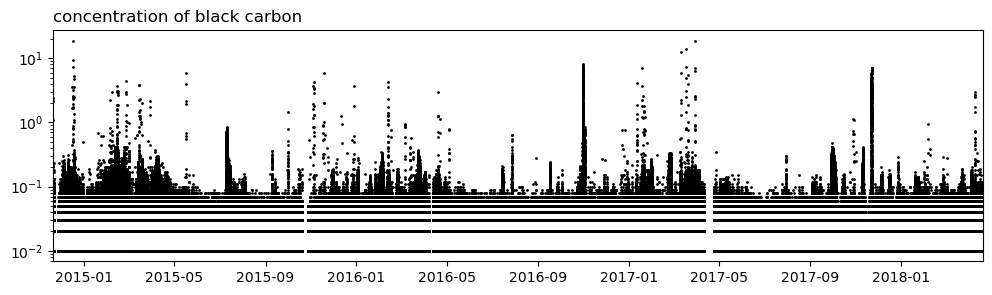

In [29]:
fu_MAAP.simple_log_plot(MAAP_2014_2018_flags_removed, var='concentration of black carbon')

### Detection limits

BC Measurement Range: 0-60, 0-180, µg/m³ BC @ 30, 10, averaging, respectively.
<br>
(95 % confidence level, 1000 l/h) 
 
Lower Detection Limits: 10 min value: < 50 ng/m³ BC; < 0.33 Mm-1 Babs
<br>
(95 % confidence level, 1000 l/h) 30 min value: < 20 ng/m³ BC; < 0.13 Mm-1 Bab

Filter the dataframe by using the detection limits based on 30 minutes

In [30]:
print(keep_extreme_values)

True


In [31]:
MAAP_2014_2018_AOD = fu_MAAP.resample_use_detection_limits(df=MAAP_2014_2018_extreme_removed_kept, var='concentration of black carbon', 
                                                      type_var='concentration', keep_extreme_values=keep_extreme_values)

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


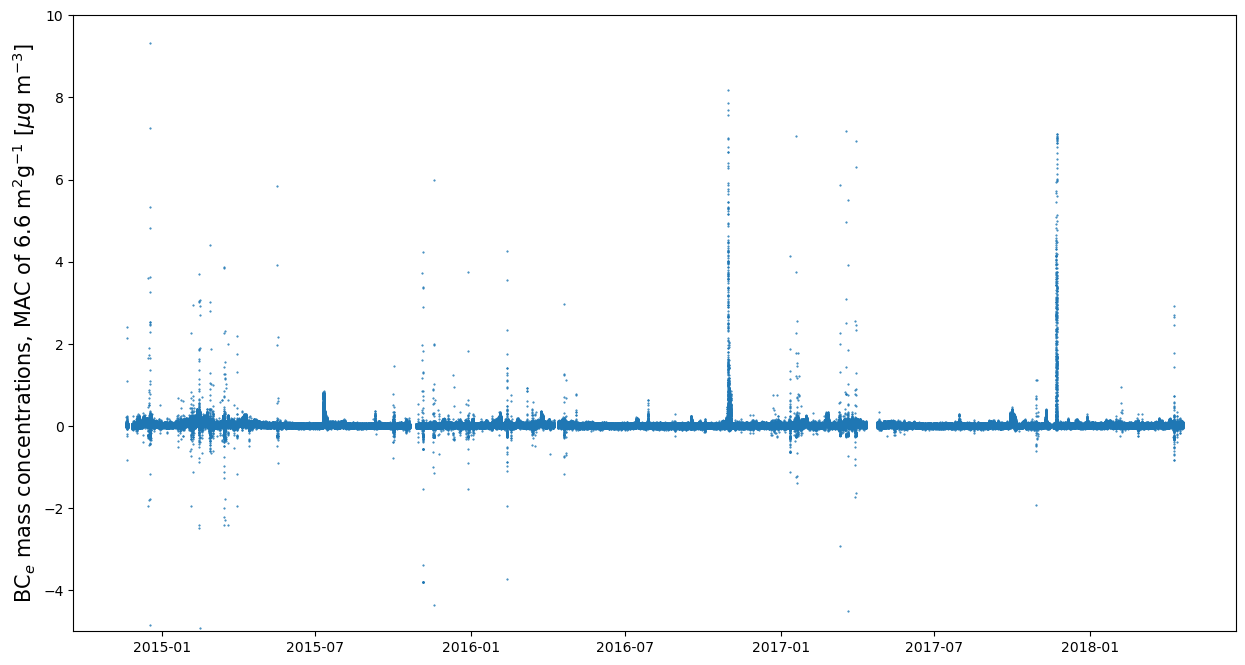

In [32]:
fu_MAAP.inital_plot(MAAP_2014_2018_AOD, var='concentration of black carbon')

In [33]:
MAAP_2014_2018 = fu_MAAP.convert_mass_con_to_abs(MAAP_2014_2018_AOD, mass_con='concentration of black carbon', MAC=6.6)

MAC of 6.6 used


## Convert to STP: 

The MAAP Black Carbon Monitor embodies a pressure and temperature compensated air
flow rate measuring probe allowing for precise measurement of both, the volumetric air
flow and the air flow referenced to standard temperature and pressure conditions (1013
hPa, temperature user selectable). 

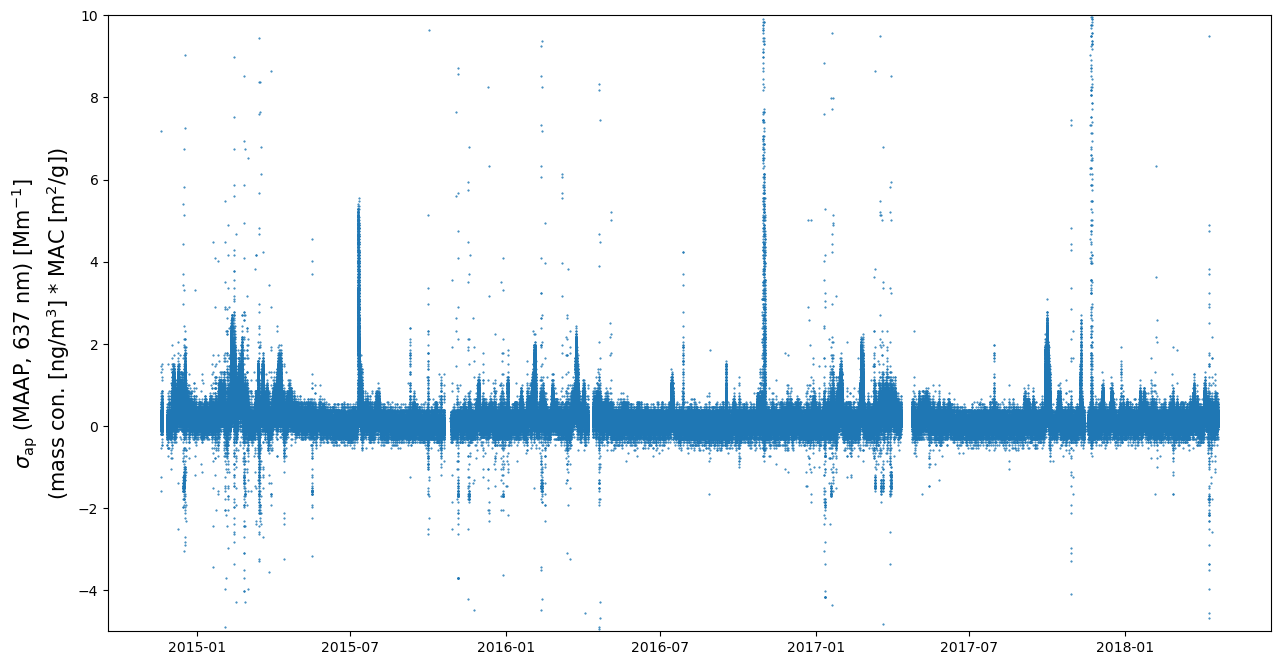

In [34]:
fu_MAAP.inital_plot(MAAP_2014_2018, var='absorption')
#plt.savefig(out_path+"MAAP_2014_2018_abs.jpeg", dpi=200,bbox_inches='tight')

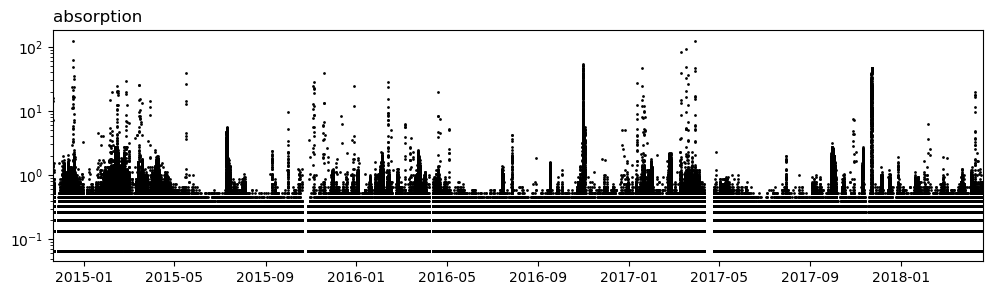

In [35]:
fig = fu_MAAP.simple_log_plot(MAAP_2014_2018, var='absorption')

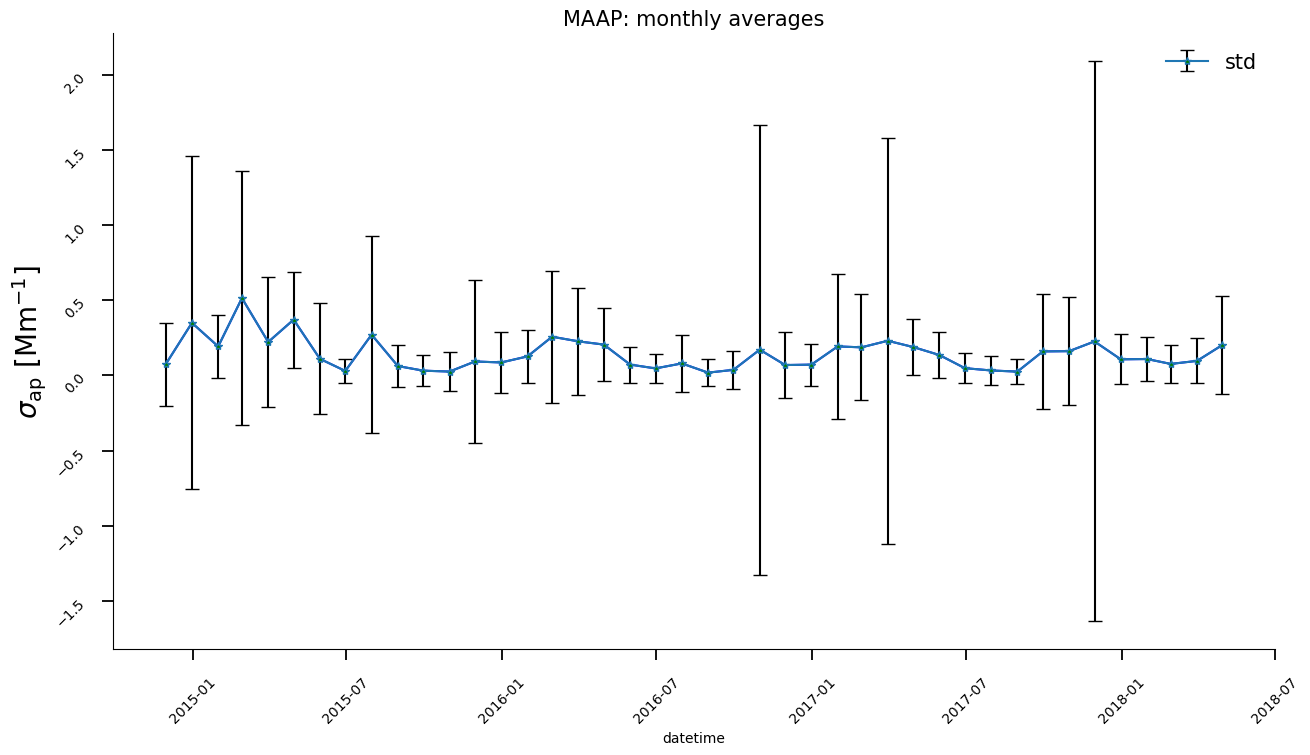

In [36]:
fig, ax = plt.subplots(figsize=(15,8))
df_monthly = fu_MAAP.produce_monthly_averages(MAAP_2014_2018, var = 'absorption')
fu_MAAP.plot_monthly_dfs(df_monthly, label='', color='blue', ax=ax)
plt.savefig(out_path+"MAAP_abs.jpeg", dpi=200,bbox_inches='tight')
plt.show()

In [37]:
MAAP_2014_2018.status.unique()
MAAP_hr_mean = MAAP_2014_2018.resample('60T').mean()
lenght_of_cleaned_hourly_data = len(MAAP_hr_mean)
print(lenght_of_cleaned_hourly_data)

29955


## Import data

## 2018

In [38]:
print(MAAP_path)
MAAP_2018 = fu_MAAP.import_NOAA_data(MAAP_path, year=2018)

C:\Users\DominicHeslinRees\Documents\ACP_2023\Data\MAAP\
length: 212


C:\Users\DominicHeslinRees\Documents\ACP_2023\scripts\MAAP_functions\MAAP_functions.py:323: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(rows_skip,0)


## 2019 - 2023

software switches

In [39]:
MAAP_2019_2023 = fu_MAAP.append_MAAP(MAAP_path, years = [2019, 2020, 2021, 2022, 2023])

2019
C:\Users\DominicHeslinRees\Documents\ACP_2023\Data\MAAP\2019\TXTformat\ZEP*
C:\Users\DominicHeslinRees\Documents\ACP_2023\Data\MAAP\2019\TXTformat\ZEP_MAAP_201901.txt
C:\Users\DominicHeslinRees\Documents\ACP_2023\Data\MAAP\2019\TXTformat\ZEP_MAAP_201902.txt
C:\Users\DominicHeslinRees\Documents\ACP_2023\Data\MAAP\2019\TXTformat\ZEP_MAAP_201903.txt
C:\Users\DominicHeslinRees\Documents\ACP_2023\Data\MAAP\2019\TXTformat\ZEP_MAAP_201904.txt
C:\Users\DominicHeslinRees\Documents\ACP_2023\Data\MAAP\2019\TXTformat\ZEP_MAAP_201905.txt
C:\Users\DominicHeslinRees\Documents\ACP_2023\Data\MAAP\2019\TXTformat\ZEP_MAAP_201906.txt
C:\Users\DominicHeslinRees\Documents\ACP_2023\Data\MAAP\2019\TXTformat\ZEP_MAAP_201907.txt
C:\Users\DominicHeslinRees\Documents\ACP_2023\Data\MAAP\2019\TXTformat\ZEP_MAAP_201908.txt
C:\Users\DominicHeslinRees\Documents\ACP_2023\Data\MAAP\2019\TXTformat\ZEP_MAAP_201909.txt
C:\Users\DominicHeslinRees\Documents\ACP_2023\Data\MAAP\2019\TXTformat\ZEP_MAAP_201910.txt
C:\Users\

## Concat dataframes

In [40]:
MAAP_2018_2023 = fu_MAAP.concat_dfs([MAAP_2018, MAAP_2019_2023])

In [41]:
MAAP_hr_mean = MAAP_2018_2023.resample('60T').mean()
lenght_of_raw_hourly_data_2018_2023 = len(MAAP_hr_mean)
print(lenght_of_raw_hourly_data_2018_2023)

43737


       count
0.001  78411
0.002  76175
0.000  75884
0.003  73312
0.004  70399


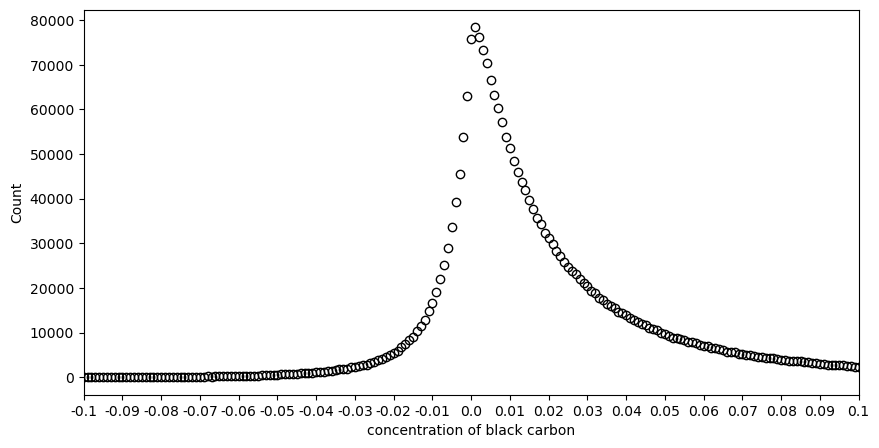

In [42]:
df_value_counts = fu_MAAP.count_values(MAAP_2018_2023, var='Inversion calculated equivalent black carbon concentration (μg/m³)')
fu_MAAP.value_count_plot(df_value_counts)

In [43]:
dict_max = fu_MAAP.create_dictionary_var_max_values(MAAP_2018_2023)
MAAP_2018_2023 = fu_MAAP.replace_max_values(MAAP_2018_2023, dict_max)

Index(['Aerosol light absorption coefficient (Mm⁻¹)',
       'Inversion calculated single scattering albedo',
       'Sample pressure (hPa)',
       'Aerosol light absorption coefficient calculated from the inversion model (Mm⁻¹)',
       'Filter ID', 'Reference detector signal',
       'Sample forward detector signal', 'Transmittance',
       'Sample 135 degree backscatter detector signal',
       'Sample 165 degree backscatter detector signal',
       'Integrated sample length Qt/A (m)',
       'Pressure drop from ambient to orifice face (hPa)',
       'Vacuum pressure pump drop across orifice (hPa)', 'Sample flow (lpm)',
       'Accumulated sample volume (m³)', 'Ambient temperature (°C)',
       'Measuring head temperature (°C)', 'System temperature (°C)',
       'Inversion calculated equivalent black carbon concentration (μg/m³)',
       'Inversion calculated aerosol optical depth of the filter',
       'List of all system parameters', 'Spot sampling parameters'],
      dtype='obje

In [44]:
MAAP_2018_2023 = fu_MAAP.carbon_concentration(MAAP_2018_2023, mass_var='Inversion calculated equivalent black carbon concentration (μg/m³)',
                         MAC=6.6)

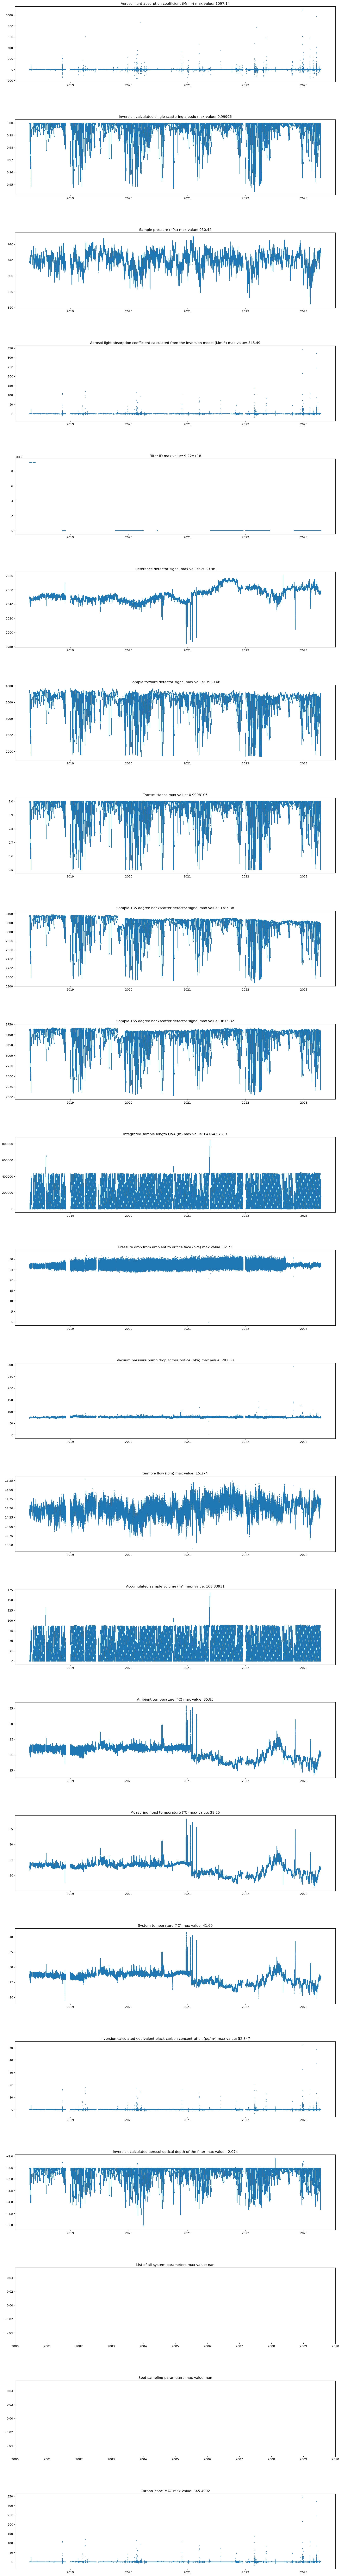

In [45]:
fu_MAAP.create_subplots(MAAP_2018_2023)

### Flags

https://gml.noaa.gov/aero/data/datafmt.html

For the flags the first 4 digits reflect the nature of the flag e.g. xxxx0200. FFFFFFFF is unknown. Hence 200 must be equilivent to 200-0200 = 0. The instrumental flags should be as follows:

there's a switch for the da.export command that will spit out flags with more description and even split if there's more than one thing going on at the same time.  see here:
https://gml.noaa.gov/webdata/aero/net/cpd3/doc/cli/da_export.html
(scroll down til you get to the --flags option to see the choices)

The flags field is the 4-character hexadecimal representation of a 32-bit integer. This specification is exclusively used in the wx_ file. The flags field of the wx_ file is organized into two parts: 0x XXXX 0000 Where the XXXX (bits 16-32) segment is specific to the wx_ file (see specification table below) and the 0000 (bits 1-16) segment is the standard for all file types (see above specification). The two combined into a 32 bit flag gives the complete wx_ file specification.

https://gml.noaa.gov/aero/software/aerosols/cpd2flags.html

0x0200	STP correction applied

In [46]:
print("Flags present in data: ")
print(MAAP_2018_2023.Status.unique())
print(MAAP_2018_2023.Status.value_counts())
print("200 makes up " + str(MAAP_2018_2023.Status.value_counts(normalize=True)['200']*100) + " % of flags")

Flags present in data: 
['FFFFFFFFFF' '200' 200 '0000000200' '0000100200' '0000300200']
0000000200    2211008
200            202486
200             96644
FFFFFFFFFF       6053
0000100200          5
0000300200          2
Name: Status, dtype: int64
200 makes up 3.840874207832611 % of flags


['FFFFFFFFFF' '200' 200 '0000000200' '0000100200' '0000300200']
type: <class 'str'>
['FFFFFFFFFF', '200', '0000000200', '0000100200', '0000300200']
0000000200    2211008
200            202486
200             96644
FFFFFFFFFF       6053
0000100200          5
0000300200          2
Name: Status, dtype: int64
['0000000200' 200 '200' 'FFFFFFFFFF' '0000100200' '0000300200']
[2211008  202486   96644    6053       5       2]
['0000000200' 200 '200' 'FFFFFFFFFF' '0000100200' '0000300200']
[0, 1, 2, 3, 4, 5]


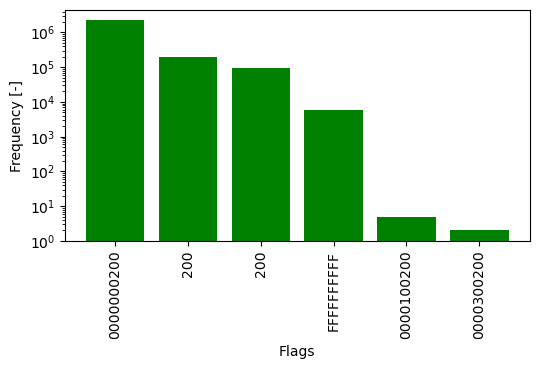

In [47]:
df_freq_instrument_flags = get_freq_flags(MAAP_2018_2023, flag_var='Status')
fig = bar_plot(df_freq_instrument_flags, var='Status')

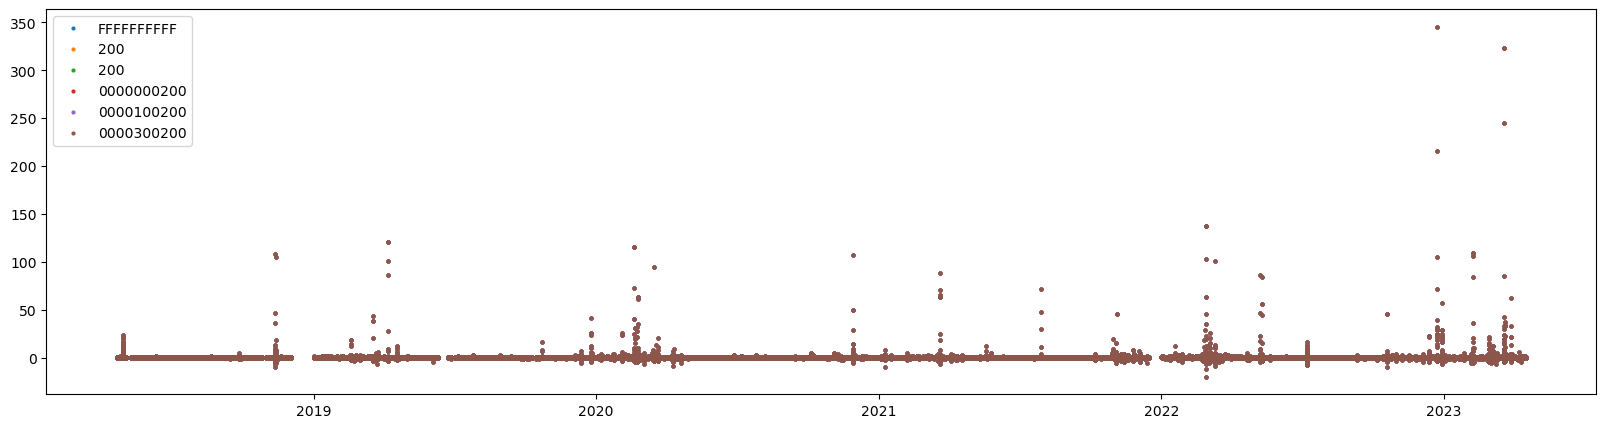

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
var = 'Aerosol light absorption coefficient calculated from the inversion model (Mm⁻¹)'
flags = MAAP_2018_2023['Status'].unique()
for flag in flags:
    ax.plot(MAAP_2018_2023.index, MAAP_2018_2023[var], 'o', ms=2, label=str(flag))
plt.legend()
plt.show()

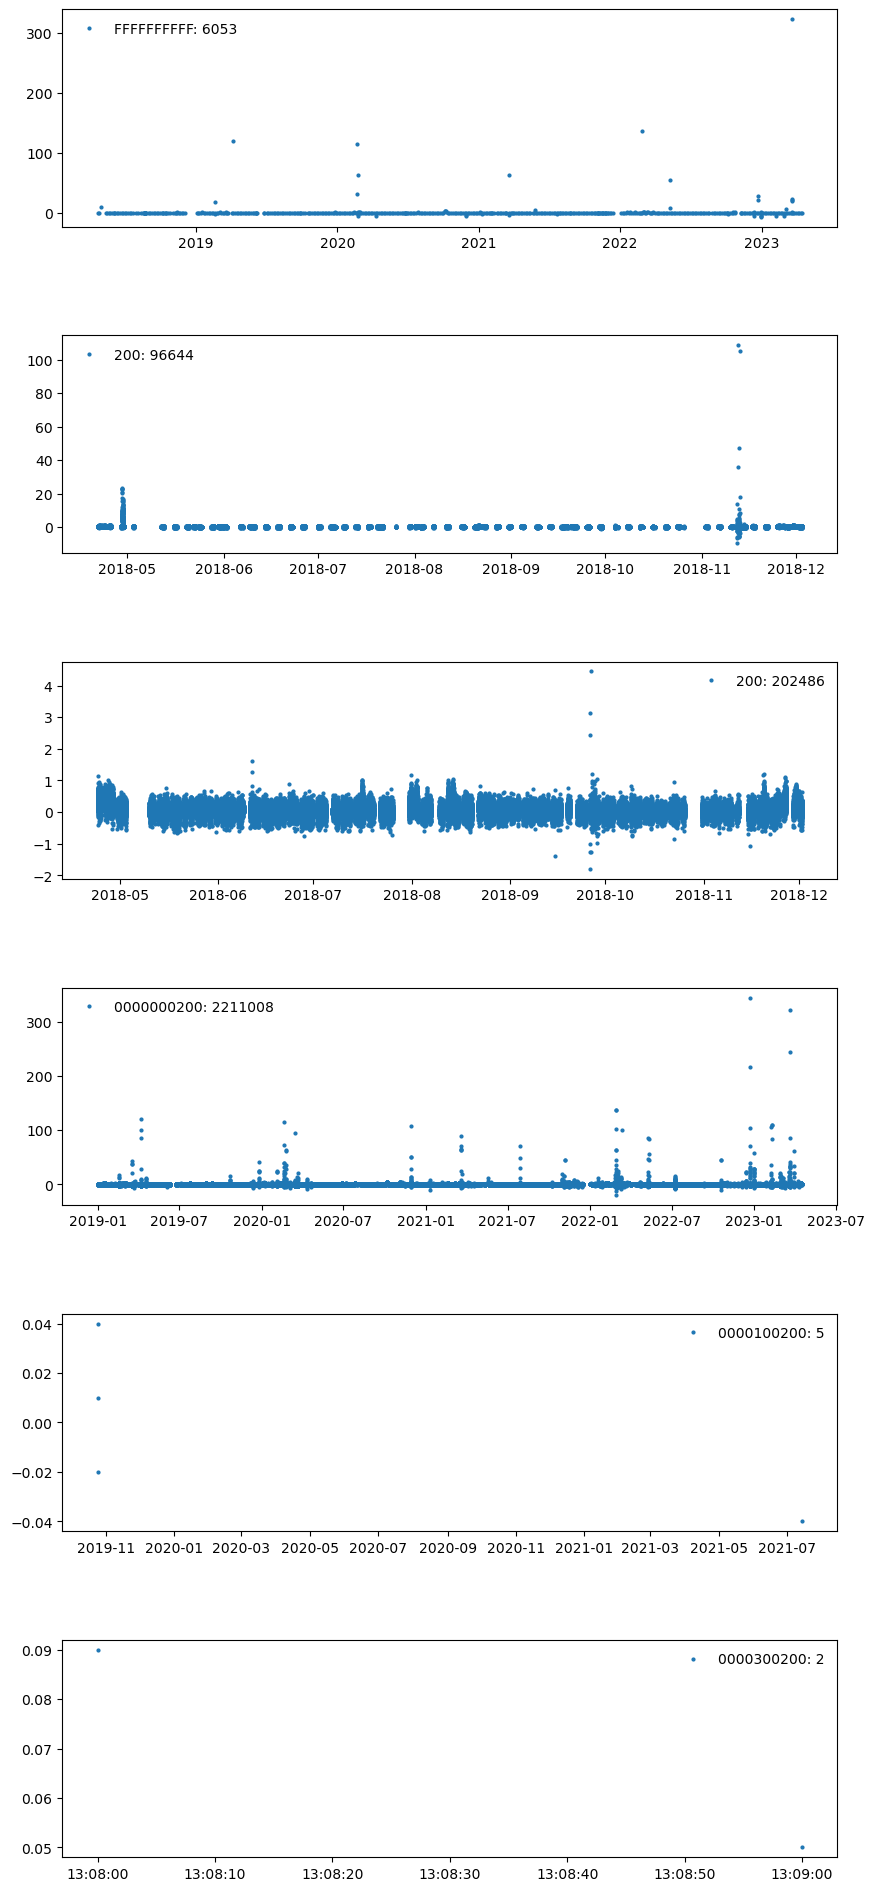

In [49]:
flags = MAAP_2018_2023['Status'].unique()
size = len(flags) 

fig, axs = plt.subplots(size,1, figsize=(10, 4*size), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
var = 'Aerosol light absorption coefficient calculated from the inversion model (Mm⁻¹)'

for flag, i in zip(flags, np.arange(0, size, 1)):
    df_flag = MAAP_2018_2023[MAAP_2018_2023['Status'] == flag]
    axs[i].plot(df_flag.index, df_flag[var], 'o', ms=2, label=str(flag)+': '+str(len(df_flag)))
    axs[i].legend(frameon=False)
plt.show()

In [50]:
def create_subplots(df):
    size = len(df.columns[3:])    
    fig, axs = plt.subplots(size,1, figsize=(20, 7*size), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()
    for i, col in enumerate(df.columns[3:]):        
        df[col] = pd.to_numeric(df[col], errors='coerce') 
        axs[i].plot(df.index, df[col].values, 'o', ms=1)
        axs[i].set_title(str(col)+' max value: '+str(df[col].max()))        
    plt.show()

In [51]:
fu_MAAP.flag_makes_up(MAAP_2018_2023, '200')

200 makes up 3.840874207832611 % of flags


'3.840874207832611'

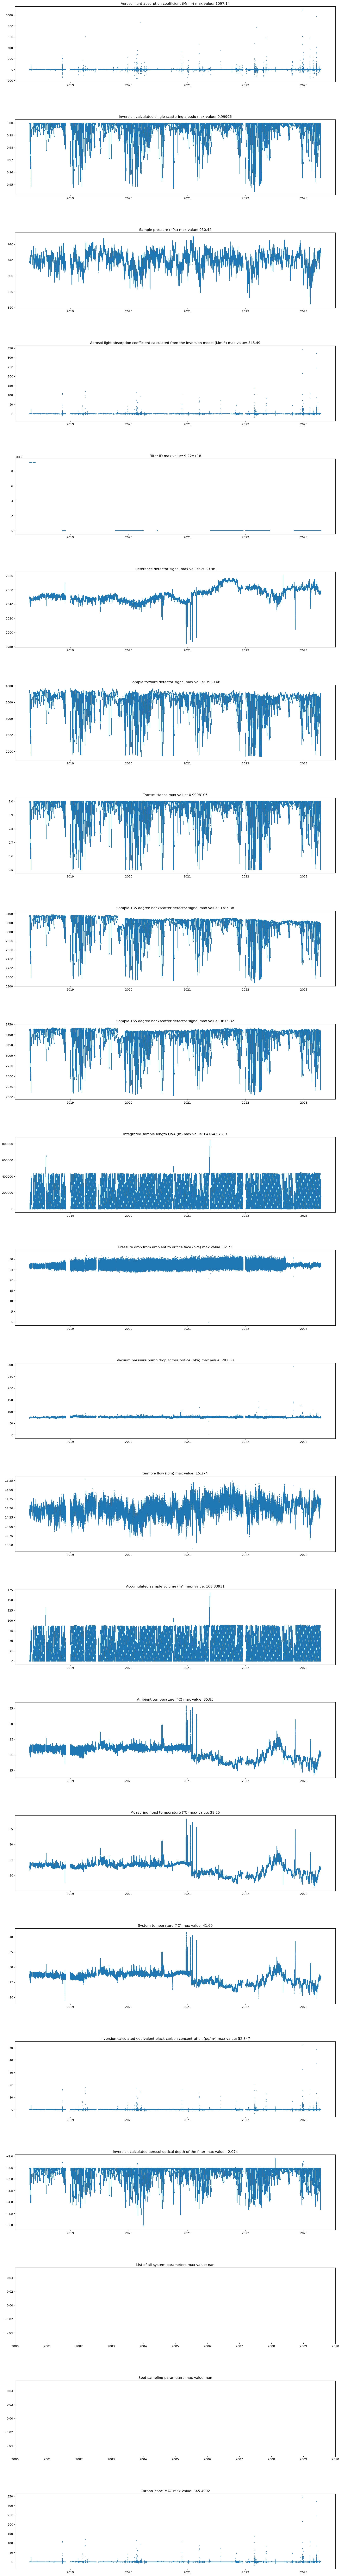

In [52]:
fu_MAAP.create_subplots(MAAP_2018_2023)

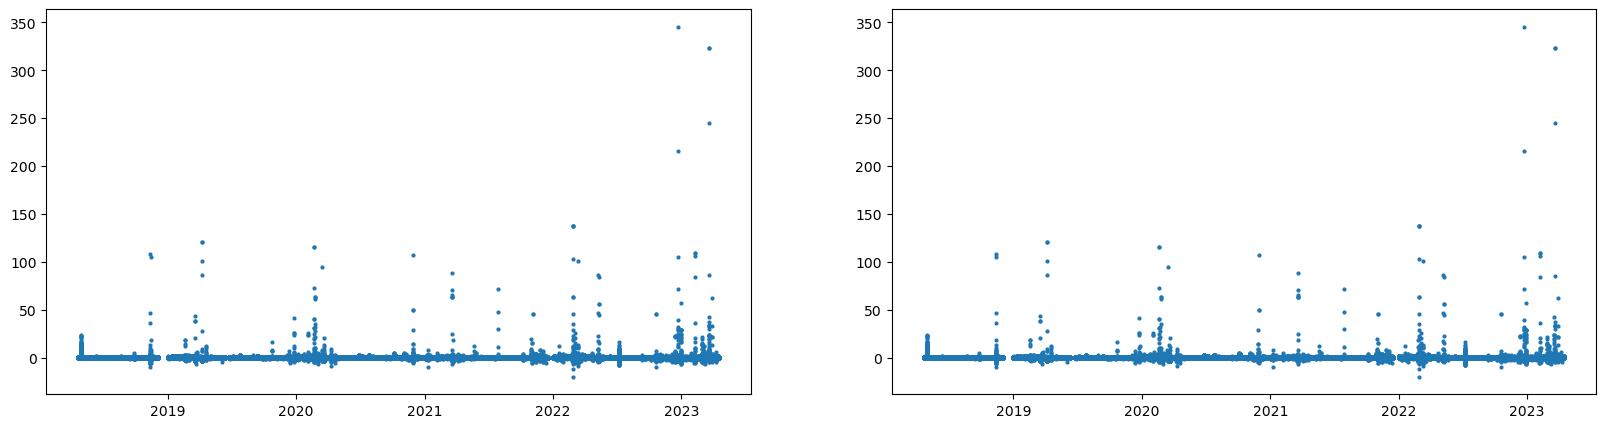

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1.plot(MAAP_2018_2023.index, MAAP_2018_2023['Carbon_conc_MAC'], 'o', ms=2)
ax2.plot(MAAP_2018_2023.index, 
         MAAP_2018_2023['Aerosol light absorption coefficient calculated from the inversion model (Mm⁻¹)'], 'o', ms=2)
plt.show()

In [54]:
MAAP_2018_2023.columns

Index(['Epoch time: seconds from 1970-01-01T00:00:00Z',
       'Fractional day of year (Midnight January 1 UTC = 1.00000)', 'Status',
       'Aerosol light absorption coefficient (Mm⁻¹)',
       'Inversion calculated single scattering albedo',
       'Sample pressure (hPa)',
       'Aerosol light absorption coefficient calculated from the inversion model (Mm⁻¹)',
       'Filter ID', 'Reference detector signal',
       'Sample forward detector signal', 'Transmittance',
       'Sample 135 degree backscatter detector signal',
       'Sample 165 degree backscatter detector signal',
       'Integrated sample length Qt/A (m)',
       'Pressure drop from ambient to orifice face (hPa)',
       'Vacuum pressure pump drop across orifice (hPa)', 'Sample flow (lpm)',
       'Accumulated sample volume (m³)', 'Ambient temperature (°C)',
       'Measuring head temperature (°C)', 'System temperature (°C)',
       'Inversion calculated equivalent black carbon concentration (μg/m³)',
       'Inversion c

In [55]:
MAAP_2018_2023_status = MAAP_2018_2023
MAAP_2018_2023_status = MAAP_2018_2023[MAAP_2018_2023['Status'] != 'FFFFFFFFFF']
MAAP_2018_2023_status = MAAP_2018_2023_status[MAAP_2018_2023_status['Status'] != '0000100200']

### Remove extreme values

In [56]:
print(MAAP_2018_2023_status['Aerosol light absorption coefficient (Mm⁻¹)'].max())
print(MAAP_2018_2023_status['Aerosol light absorption coefficient calculated from the inversion model (Mm⁻¹)'].max())

1097.14
345.49


In [57]:
MAAP_2018_2023_extreme_removed = fu_MAAP.remove_extreme_values(MAAP_2018_2023_status, var='Aerosol light absorption coefficient calculated from the inversion model (Mm⁻¹)',
                                                      keep_extreme_values=keep_extreme_values)

Keep extreme values: True


In [58]:
if keep_extreme_values == False:
    fu_MAAP.inital_2plot(MAAP_2018_2023_status, MAAP_2018_2023_extreme_removed, var='Aerosol light absorption coefficient calculated from the inversion model (Mm⁻¹)')

## Minimum flow

In [59]:
MAAP_2018_2023_flowlimit = fu_MAAP.select_for_flow(MAAP_2018_2023_extreme_removed, MAAP_2014_2018_flags_removed,
                                                   min_flow = 900)

df size before flow control: 1733455
df size after flow control: 2510140


C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


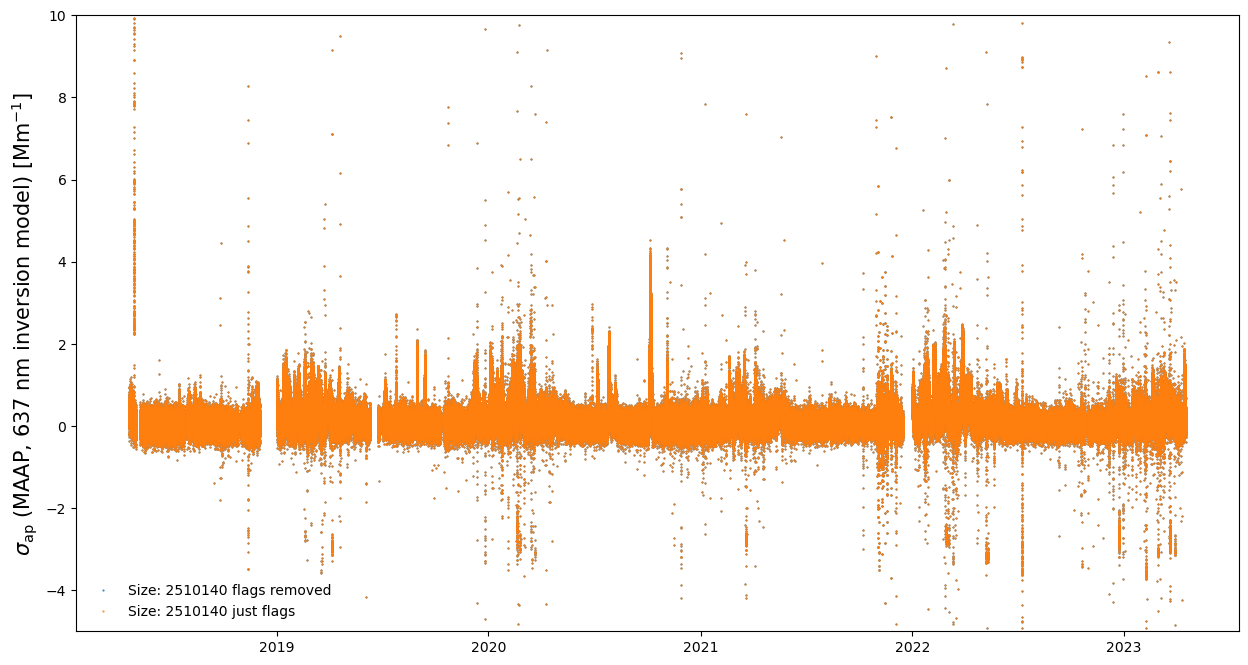

In [60]:
fu_MAAP.inital_2plot(MAAP_2018_2023_extreme_removed, MAAP_2018_2023_flowlimit, 
                     var='Aerosol light absorption coefficient calculated from the inversion model (Mm⁻¹)')

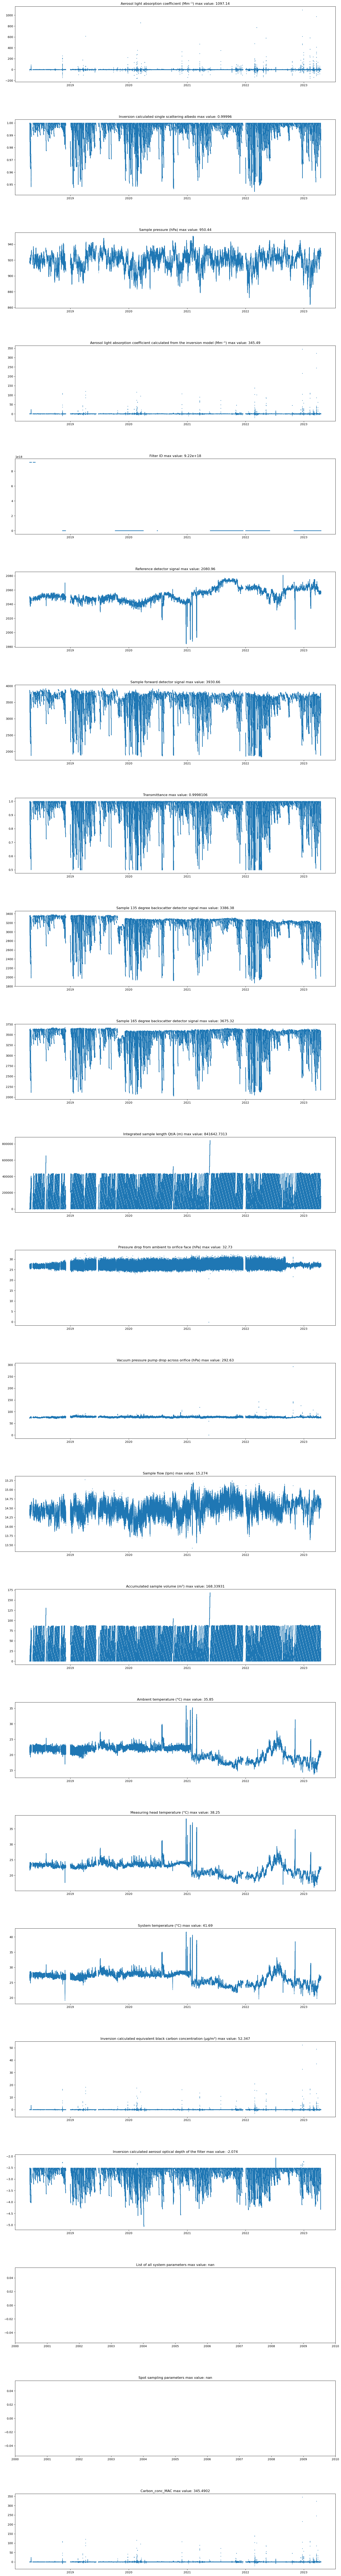

In [61]:
fu_MAAP.create_subplots(MAAP_2018_2023_flowlimit)

### Detection limits

BC Measurement Range: 0-60, 0-180, µg/m³ BC @ 30, 10, averaging, respectively.
(95 % confidence level, 1000 l/h)

Lower Detection Limits: 10 min value: < 50 ng/m³ BC; < 0.33 Mm-1 Babs
(95 % confidence level, 1000 l/h) 30 min value: < 20 ng/m³ BC; < 0.13 Mm-1 Babs

Filter the dataframe by using the detection limits based on 30 minutes

In [62]:
MAAP_2018_2023 = fu_MAAP.resample_use_detection_limits(df=MAAP_2018_2023_flowlimit,
                                                var='Aerosol light absorption coefficient calculated from the inversion model (Mm⁻¹)', 
                                                type_var='absorption', keep_extreme_values=keep_extreme_values)

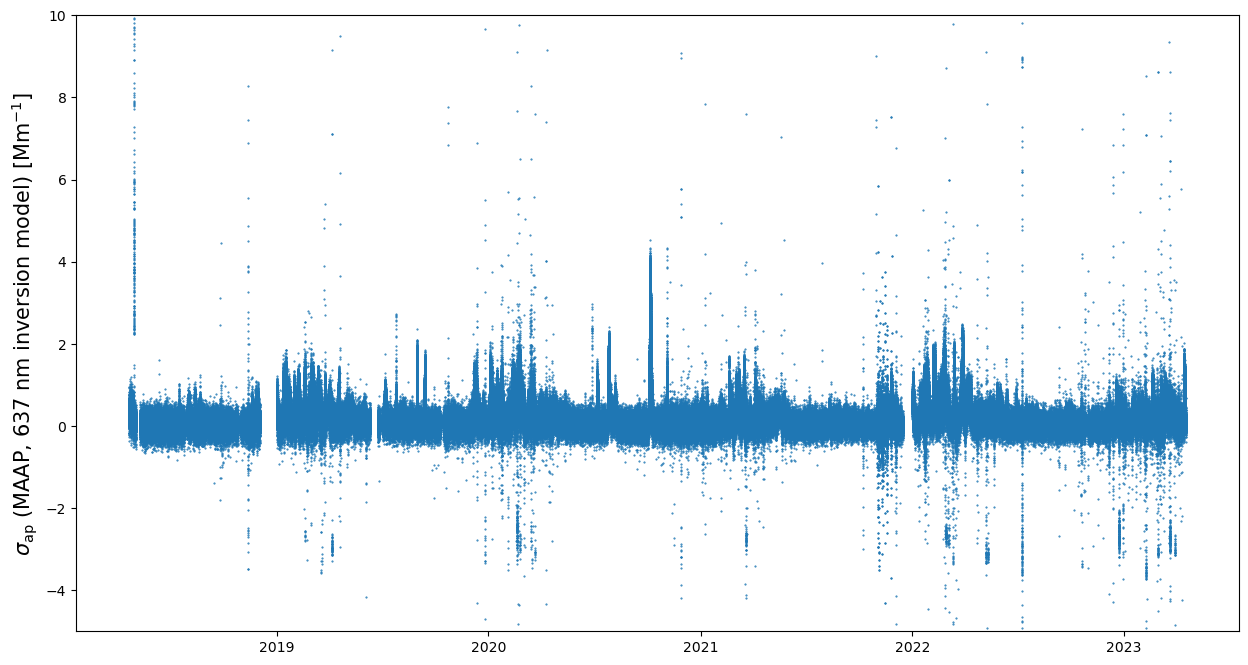

In [63]:
fu_MAAP.inital_plot(MAAP_2018_2023, var='Aerosol light absorption coefficient calculated from the inversion model (Mm⁻¹)')
#plt.savefig(out_path+"MAAP_2014_2018_abs_inversion.jpeg", dpi=200,bbox_inches='tight')

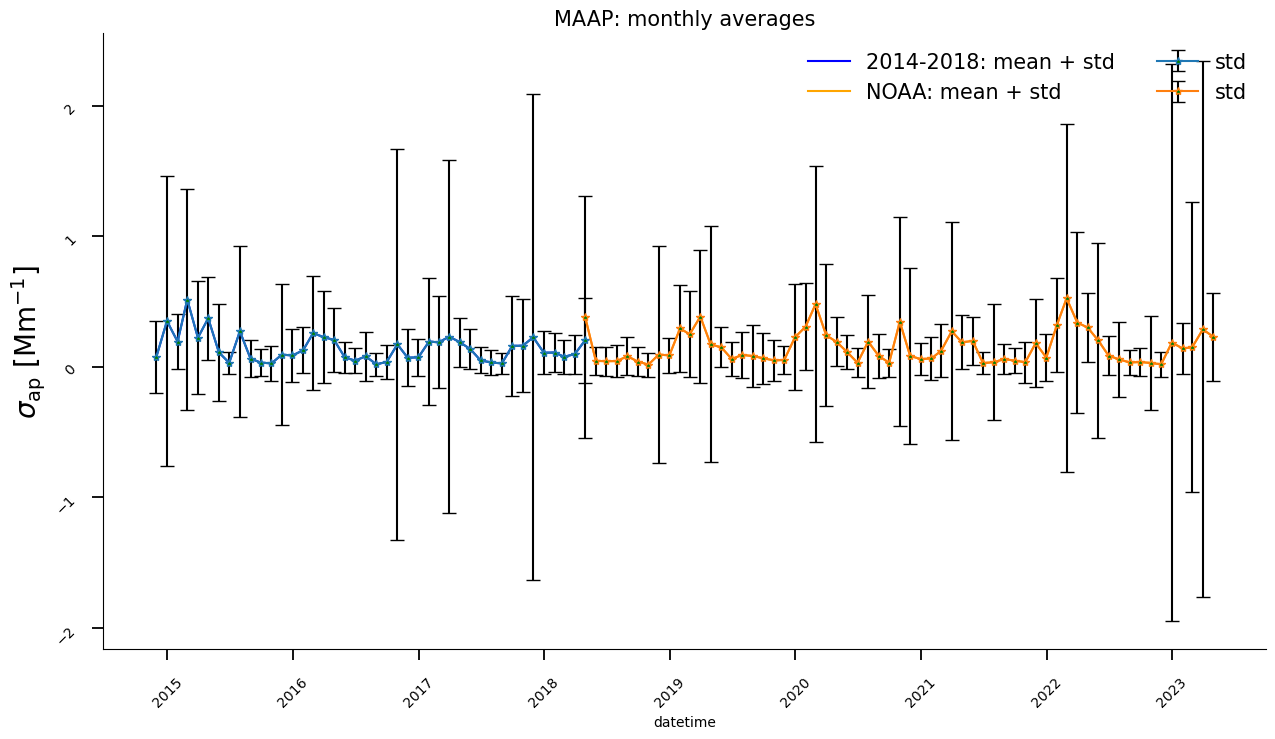

In [64]:
fig, ax = plt.subplots(figsize=(15,8))
df_monthly_2018_2023 = fu_MAAP.produce_monthly_averages(MAAP_2018_2023,
                                                var='Aerosol light absorption coefficient calculated from the inversion model (Mm⁻¹)')
fu_MAAP.plot_monthly_dfs(df_monthly, label='2014-2018: mean + std', color='blue', ax=ax)
fu_MAAP.plot_monthly_dfs(df_monthly_2018_2023, label='NOAA: mean + std', color='orange', ax=ax)
#plt.savefig(out_path+"MAAP_abs.jpeg", dpi=200,bbox_inches='tight')
plt.show()

In [65]:
MAAP_2018_2023.rename(columns={"Aerosol light absorption coefficient calculated from the inversion model (Mm⁻¹)":"absorption"}, inplace=True)

In [66]:
MAAP_hr_mean = MAAP_2018_2023.resample('60T').mean()
lenght_of_cleaned_hourly_data_2018_2023 = len(MAAP_hr_mean)
print(lenght_of_cleaned_hourly_data_2018_2023)

43723


In [67]:
MAAP = fu_MAAP.concat_dfs([MAAP_2014_2018, MAAP_2018_2023])

In [68]:
MAAP.head(2)

date      time  status  \
2014-11-19 15:53:24  14-11-19  15:54:00  000000   
2014-11-19 15:54:24  14-11-19  15:55:00  000000   

                     concentration of black carbon  mass of black carbon  \
2014-11-19 15:53:24                           0.01                   0.0   
2014-11-19 15:54:24                           0.01                   0.0   

                     air flow rate  last value  \
2014-11-19 15:53:24          999.0        0.01   
2014-11-19 15:54:24          999.0        0.01   

                     mean values of the concentration\n of black carbon over 1h  \
2014-11-19 15:53:24                                                0.0            
2014-11-19 15:54:24                                                0.0            

                       3h  24h  ... Sample flow (lpm)  \
2014-11-19 15:53:24  0.37  0.2  ...               NaN   
2014-11-19 15:54:24  0.37  0.2  ...               NaN   

                     Accumulated sample volume (m³)  Ambient temperature (°C)  \
2014-11-19 15:53:24                             NaN                       NaN   
2014-11-19 15:54:24                             NaN                       NaN   

                     Measuring head temperature (°C) System temperature (°C)  \
2014-11-19 15:53:24                              NaN                     NaN   
2014-11-19 15:54:24                              NaN                     NaN   

                     Inversion calculated equivalent black carbon concentration (μg/m³)  \
2014-11-19 15:53:24                                                NaN                    
2014-11-19 15:54:24                                                NaN                    

                     Inversion calculated aerosol optical depth of the filter  \
2014-11-19 15:53:24                                                NaN          
2014-11-19 15:54:24                                                NaN          

                     List of all system parameters  Spot sampling parameters  \
2014-11-19 15:53:24                            NaN                       NaN   
2014-11-19 15:54:24                            NaN                       NaN   

                     Carbon_conc_MAC  
2014-11-19 15:53:24              NaN  
2014-11-19 15:54:24              NaN  

[2 rows x 37 columns]

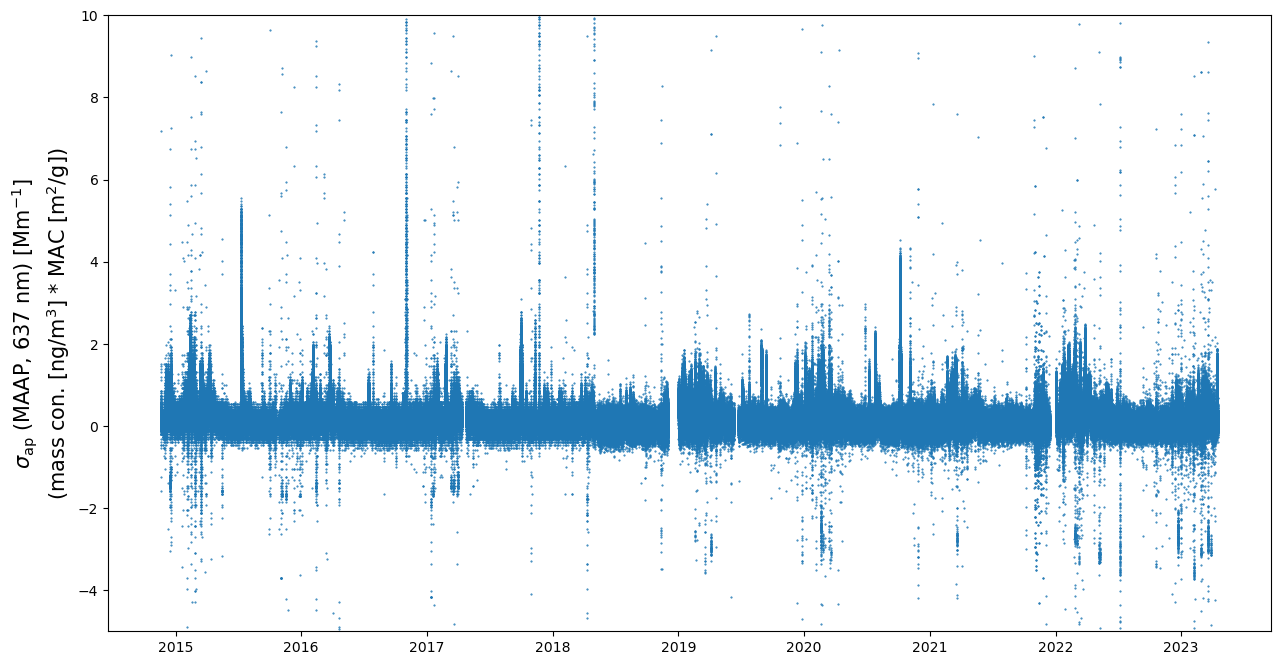

In [69]:
fu_MAAP.inital_plot(MAAP, var='absorption')

# Hourly resample

the saved file is named based on whether to keep all the data points i.e. so-called extreme values (below detection limit)

In [70]:
MAAP_hourly_mean, MAAP_hourly_median = fu_MAAP.hourly_averages(MAAP, keep_extreme_values=True)
dict_extremes = {False:'no_extremes', True:'extremes'}

print("Median: ")
print(savepath+'hourly_MAAP_median_'+str(dict_extremes[keep_extreme_values])+'.dat')
MAAP_hourly_median.to_csv(savepath+'hourly_MAAP_median_'+str(dict_extremes[keep_extreme_values])+'.dat',index=True)

print("Mean: ")
print(savepath+'hourly_MAAP_mean_'+str(dict_extremes[keep_extreme_values])+'.dat')
MAAP_hourly_mean.to_csv(savepath+'hourly_MAAP_mean_'+str(dict_extremes[keep_extreme_values])+'.dat',index=True)

Median: 
C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\absorption\MAAP\hourly_MAAP_median_extremes.dat
Mean: 
C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\absorption\MAAP\hourly_MAAP_mean_extremes.dat


In [71]:
print(MAAP_hourly_median.min())
print(MAAP_hourly_mean.min())

absorption   -2.87
dtype: float64
absorption   -2.726667
dtype: float64


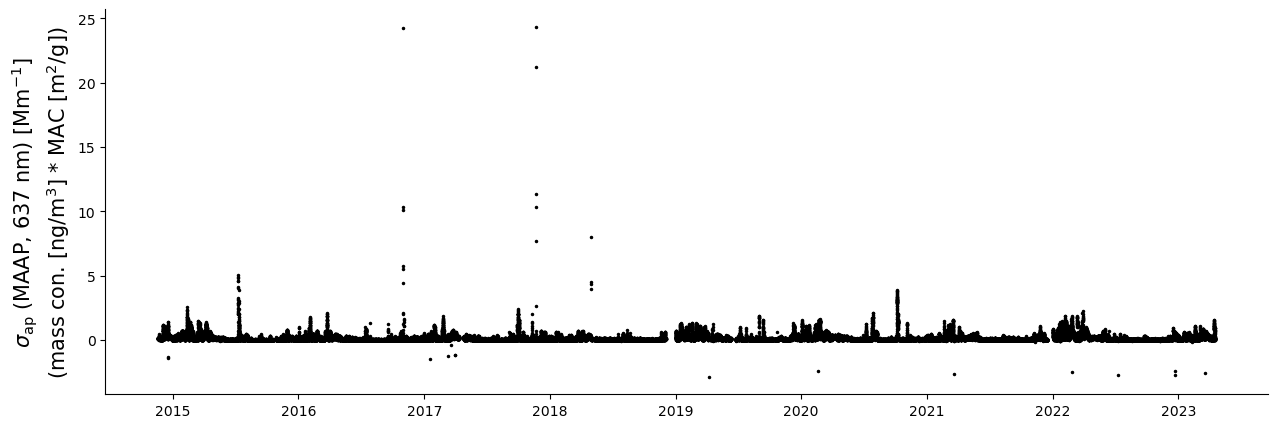

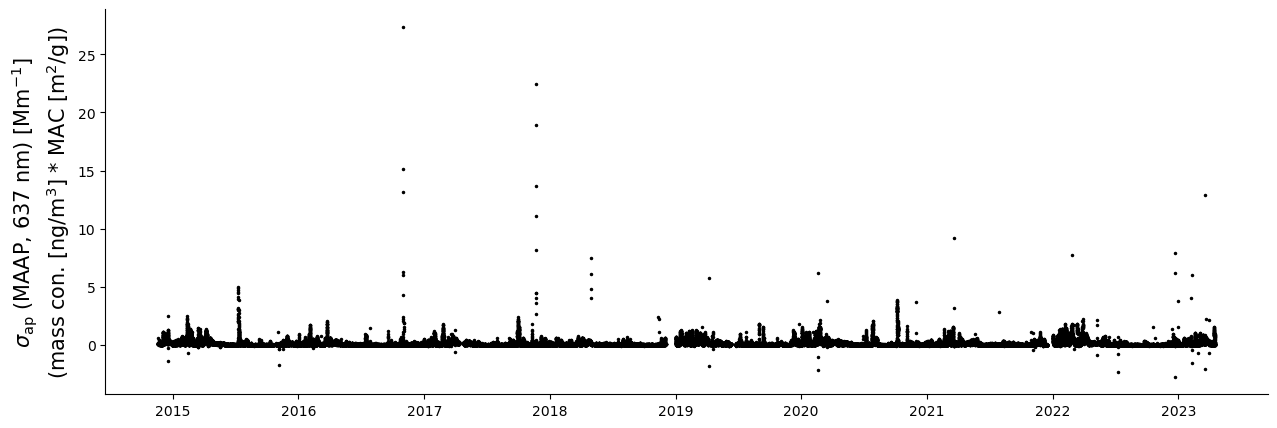

In [72]:
fu_MAAP.plot(MAAP_hourly_median, var='absorption')
fu_MAAP.plot(MAAP_hourly_mean, var='absorption')

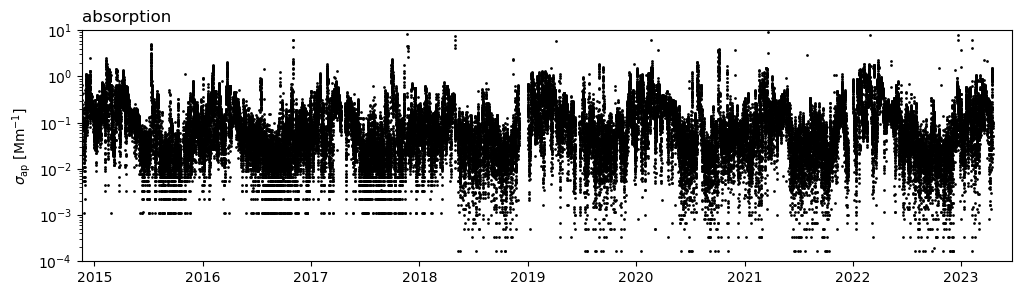

['C:\\Users\\DominicHeslinRees\\Documents\\ACP_2023\\Data\\processed_data\\plots\\']
make folder
saved as: C:\Users\DominicHeslinRees\Documents\ACP_2023\Data\processed_data\plots\\\MAAP_log.jpeg


In [73]:
fig = fu_MAAP.simple_log_plot(MAAP_hourly_mean, var='absorption', ymin=10**(-4), ymax=10**(1), 
                xmin='2014-11-19 15:14:16', xmax='2023-06-20 17:13:11',
                ylabel=r'$\sigma_{\mathrm{ap}}$ [Mm$^{-1}$]', add_hour_lines=False)

fu_MAAP.save_plot(fig, path=out_path, folder='', 
              name='MAAP_log', formate=".jpeg")